In [1]:
import joblib 
import numpy as np 
from matplotlib import pyplot as plt 
from uncertainties import ufloat, unumpy

from pathlib import Path
from tqdm import tqdm
from numpy import array
import sys
sys.path.append("..")
from core.utils import *
import atlas_mpl_style as ampl
import random
import mplhep as hep
hep.style.use("ATLAS")
import random

pkl_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_new'
#pkl_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_prob'  # probability
#pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/note_plots'  # loose jet cleaning
pkl_path = Path(pkl_path)
nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'Extraction_Results'


In [9]:
reweighting_vars = ['none','jet_nTracks', 'GBDT_newScore']
nominal_keys = [reweighting_var + '_quark_reweighting_weights' for reweighting_var in reweighting_vars]
WPs = [0.5, 0.6, 0.7, 0.8]
partons=['Quark','Gluon']
label_var=['jet_nTracks','GBDT_newScore']
label_ptrange = [500, 600, 800, 1000, 1200, 1500,2000]
bin_centers = 0.5 * (np.array(label_ptrange[:-1]) + np.array(label_ptrange[1:]))
Map_var_title = {
    "jet_pt": "$p_{T}$",
    "jet_nTracks": "$n_{trk}$",
    "jet_trackBDT": "old BDT",
    "jet_eta": "$\eta$",
    "jet_trackC1": "$C_{1}$",
    "jet_trackWidth": "$w^{trk}$",
    "GBDT_newScore": "BDT score"
}
HistBins={
   "jet_nTracks": np.linspace(0, 60, 61),
   #'GBDT_newScore' : np.linspace(0, 1.0, 51),
   'GBDT_newScore' : np.linspace(-5.0, 5.0, 101),
}

Map_gen={
"nominal": "Pythia",
"hadronization/sherpa": "Sherpa (Cluster Had.)",
"hadronization/sherpalund": "Sherpa (String Had.)",
"matrix_element/powhegpythia":"Powheg + Pythia" ,
"parton_shower/herwigangle":"Herwig (Angluar Shower)",
"parton_shower/herwigdipole":"Herwig (Dipole Shower)",
}

In [5]:
def safe_array_divide_unumpy(numerator, denominator):
    if 0 in unumpy.nominal_values(denominator):
        _denominator_nominal_values = unumpy.nominal_values(denominator)
        _denominator_std_devs = unumpy.std_devs(denominator)
        zero_idx = np.where(_denominator_nominal_values==0)[0]
        _denominator_nominal_values[zero_idx] = np.inf
        _denominator_std_devs[zero_idx] = 0 
        _denominator = unumpy.uarray(_denominator_nominal_values, _denominator_std_devs)

        ratio = np.true_divide(numerator, _denominator) 
        # raise Warning(f"0 exists in the denominator for unumpy, check it!")
    else:
        ratio = np.true_divide(numerator, denominator)        
    return ratio

markers=['s','^','*','X','P','1']
ind = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
ind_all = ind(15)

/tmp/ipykernel_193345/2317286930.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, gridspec_kw={'height_ratios': [4, 1, 1], 'hspace': 0.1})


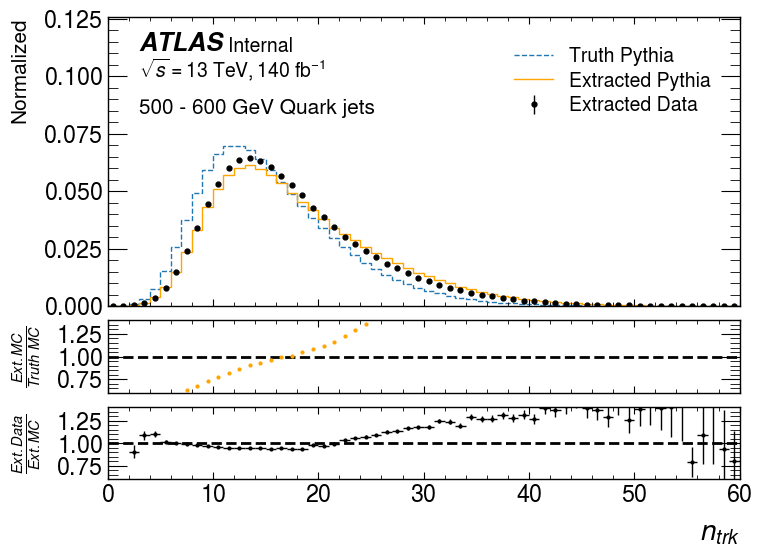

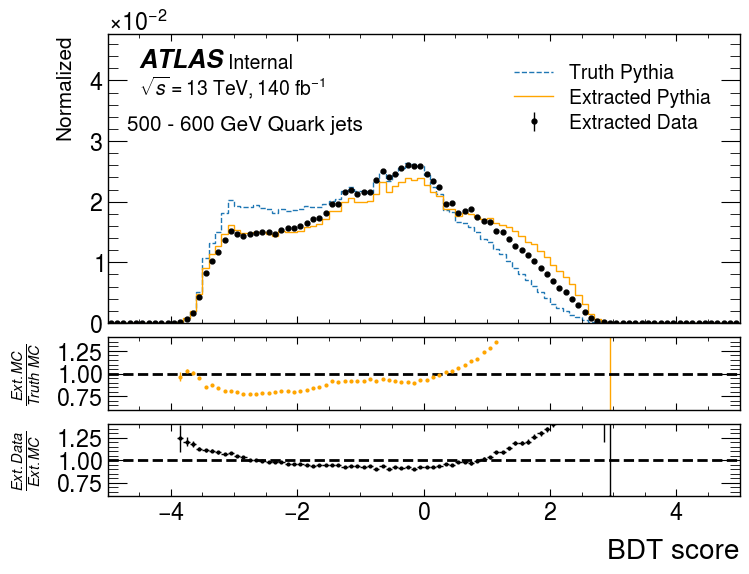

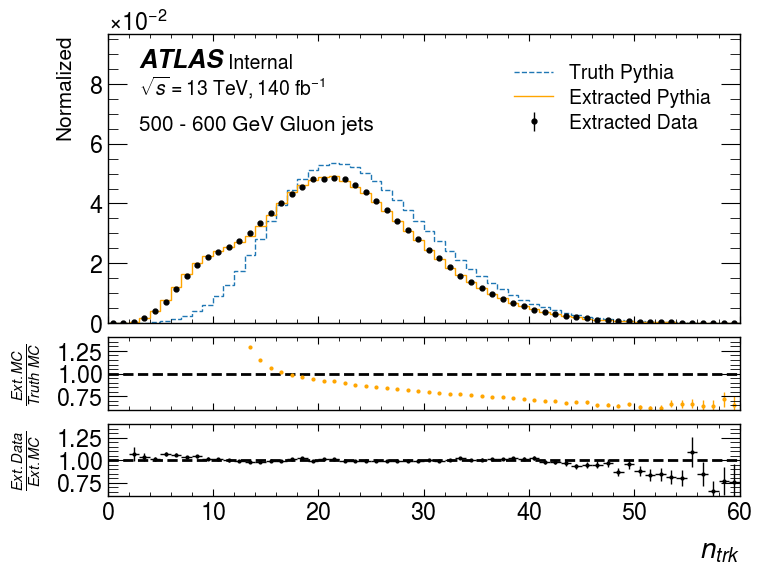

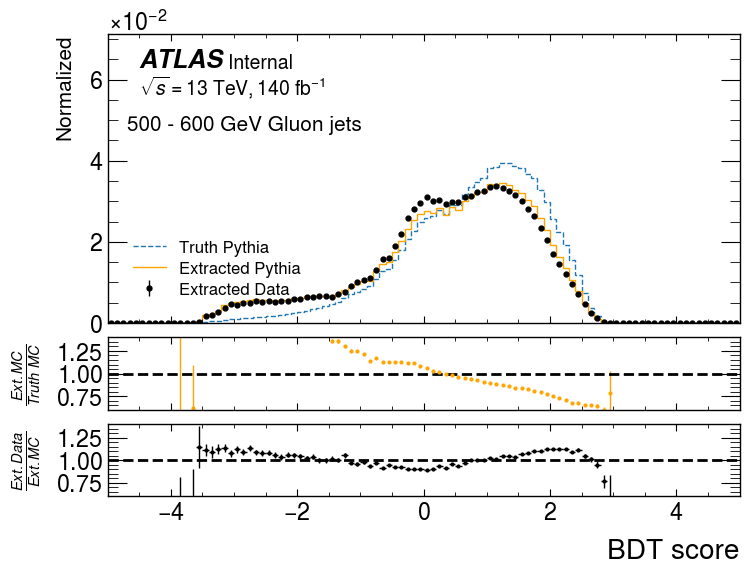

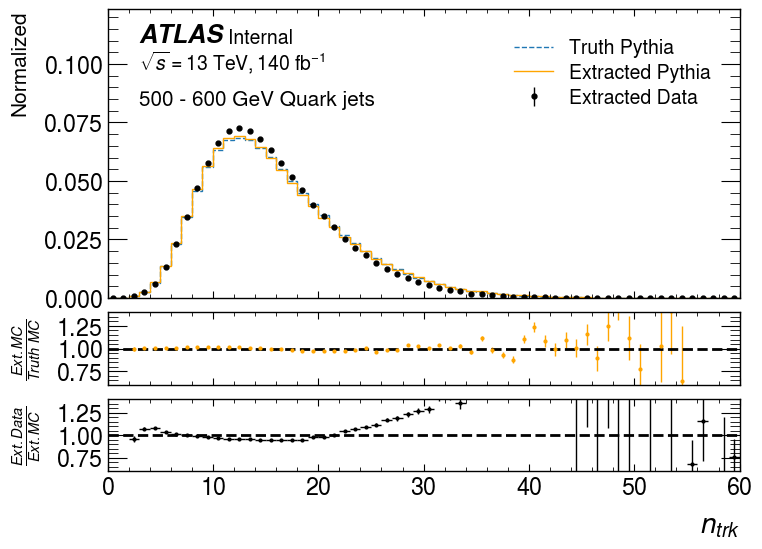

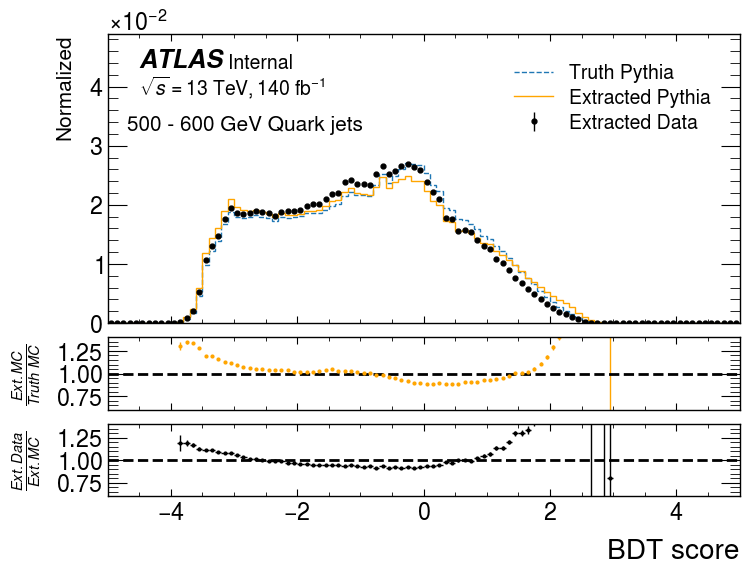

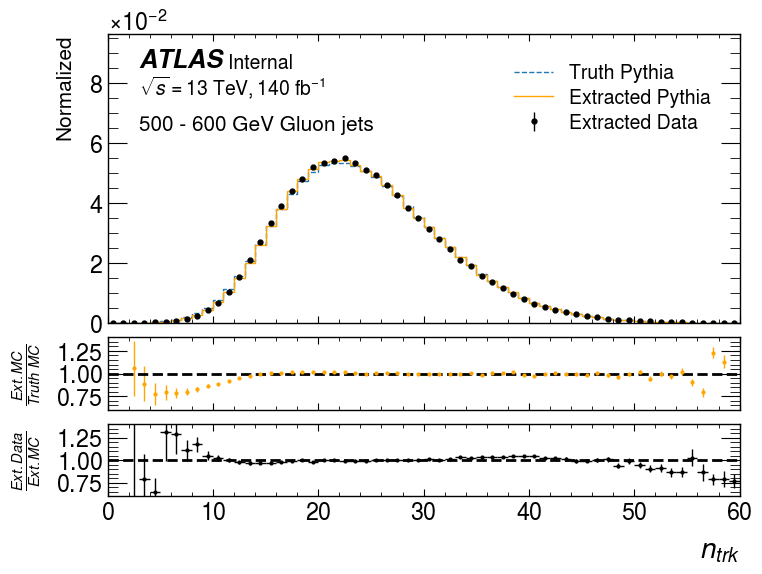

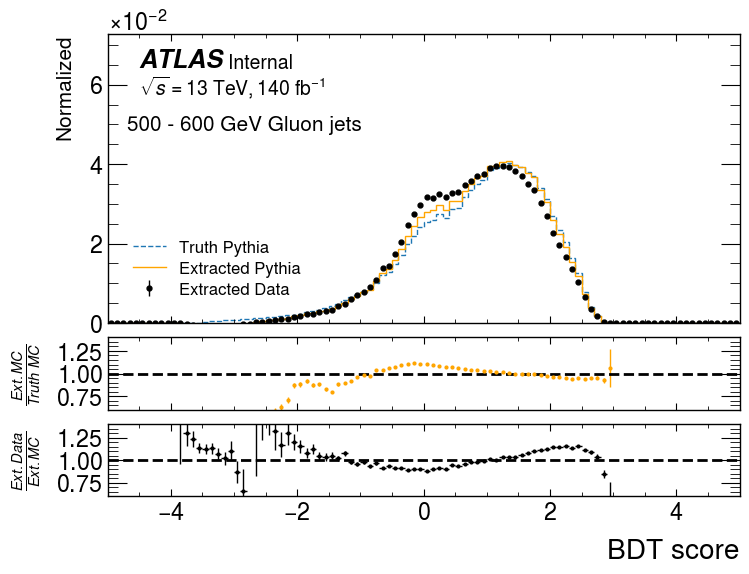

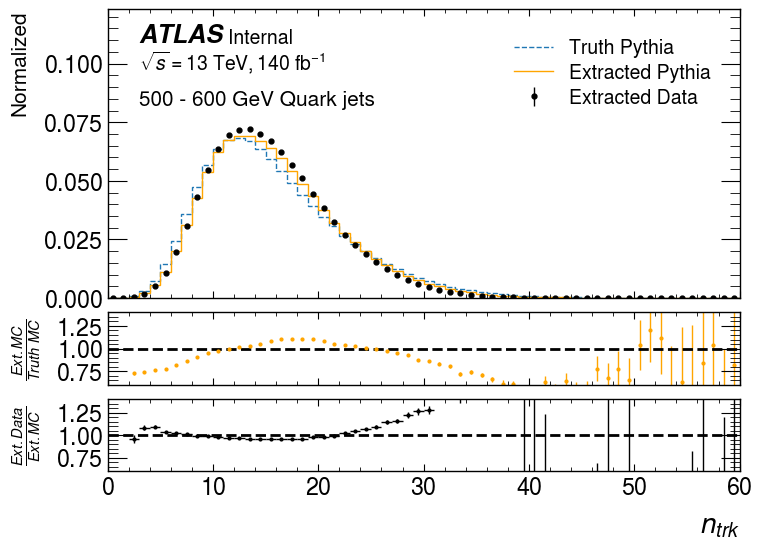

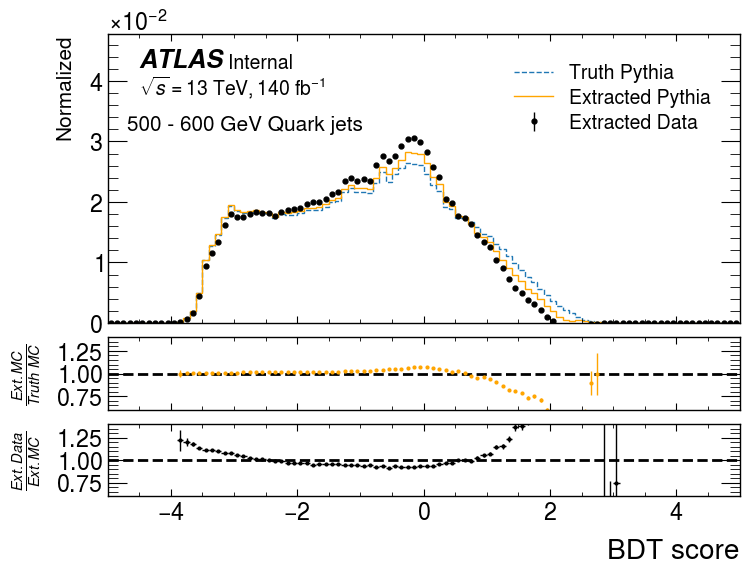

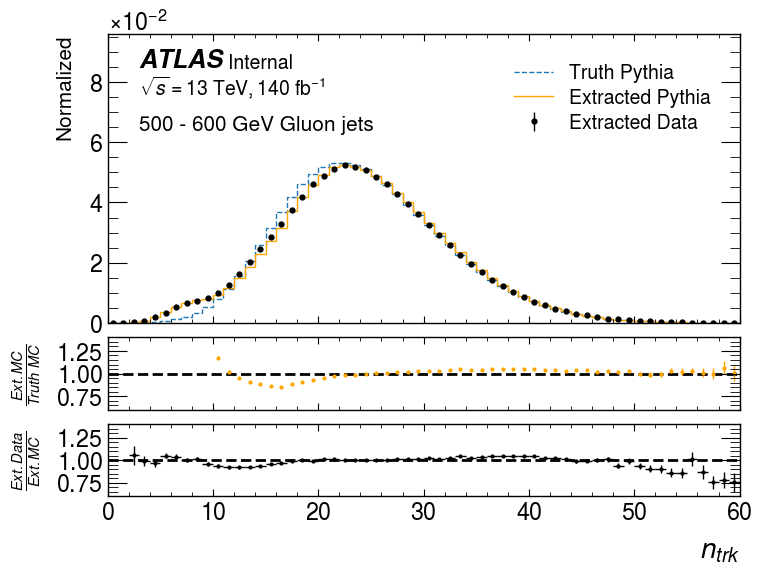

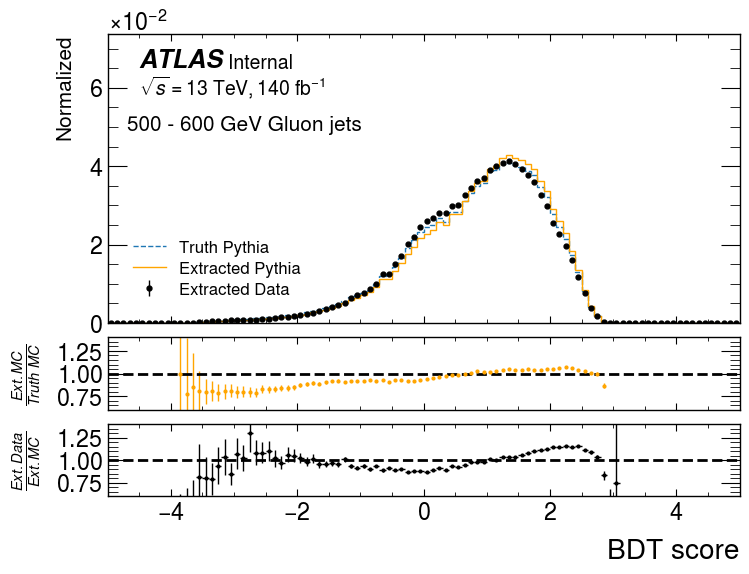

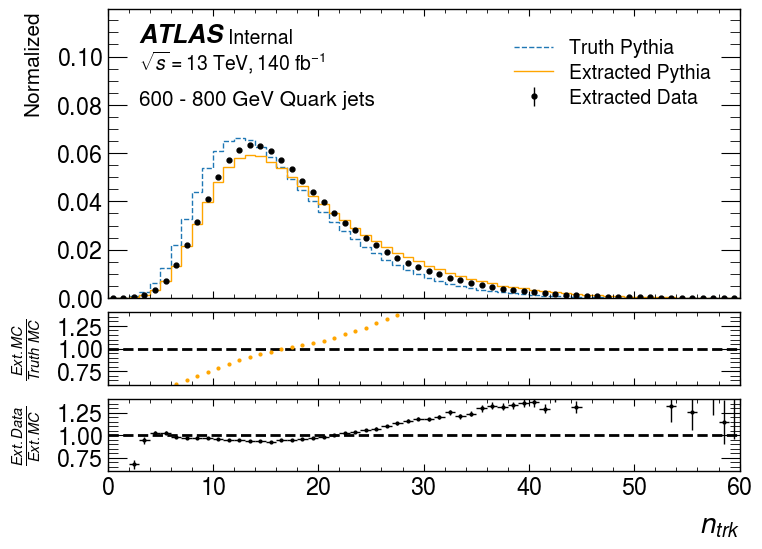

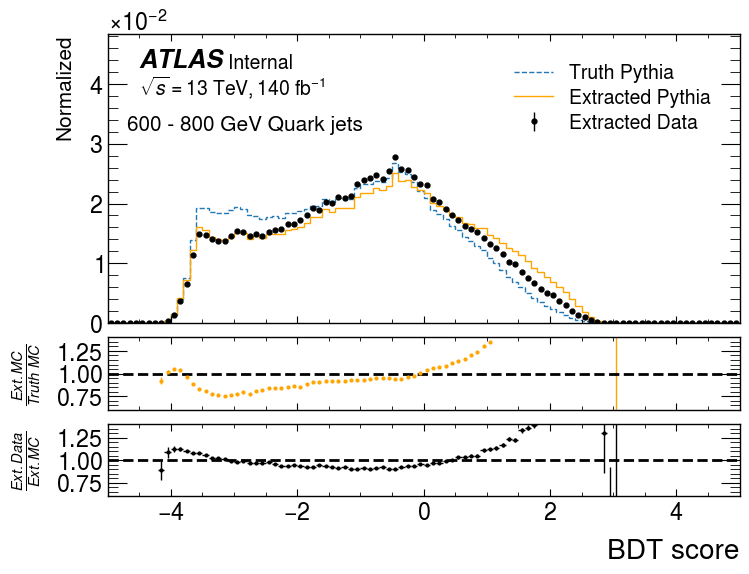

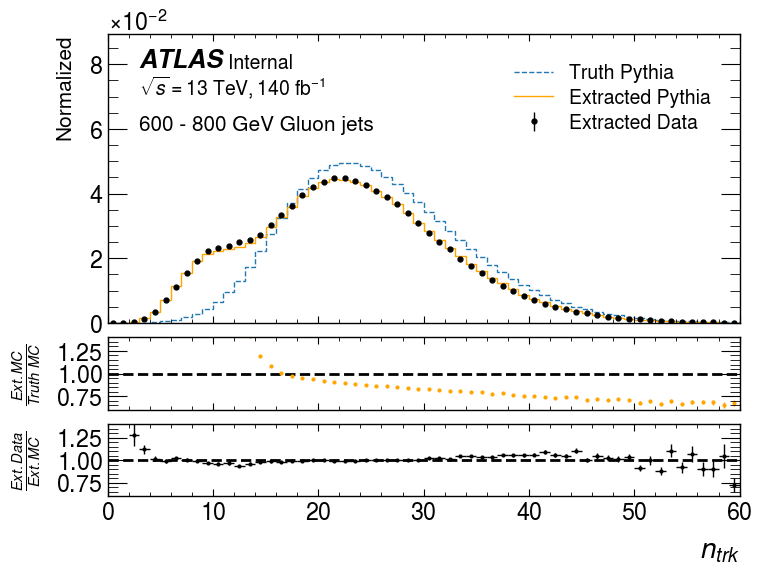

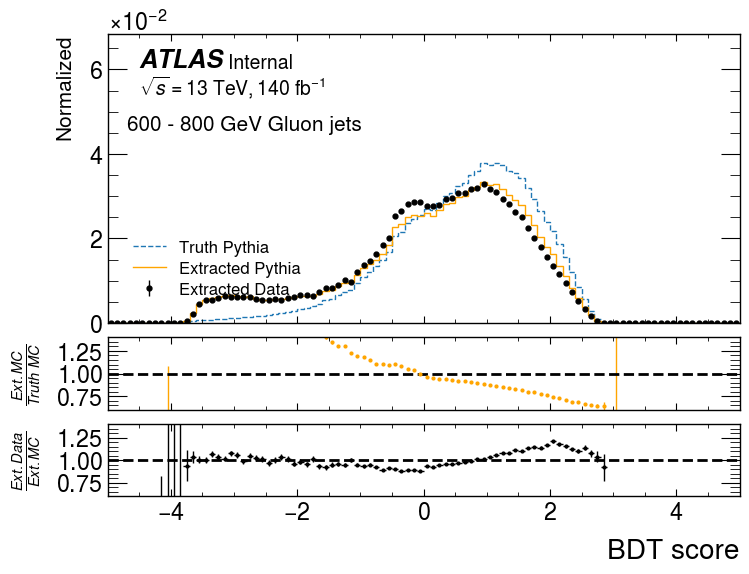

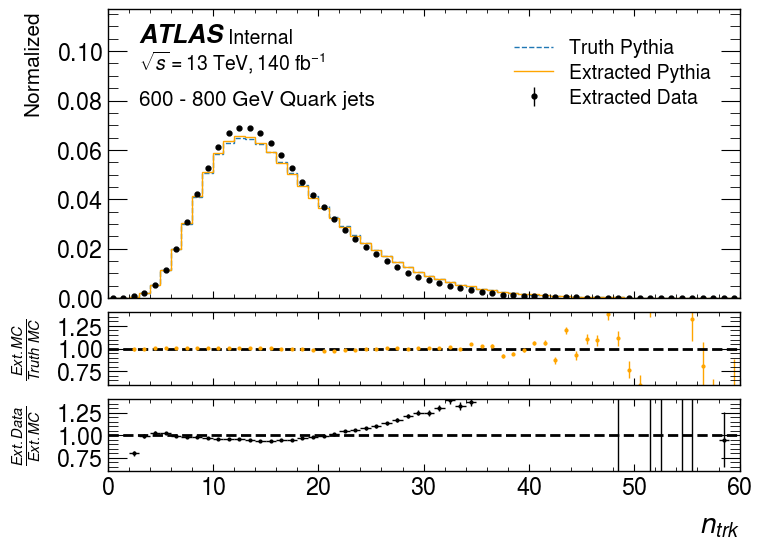

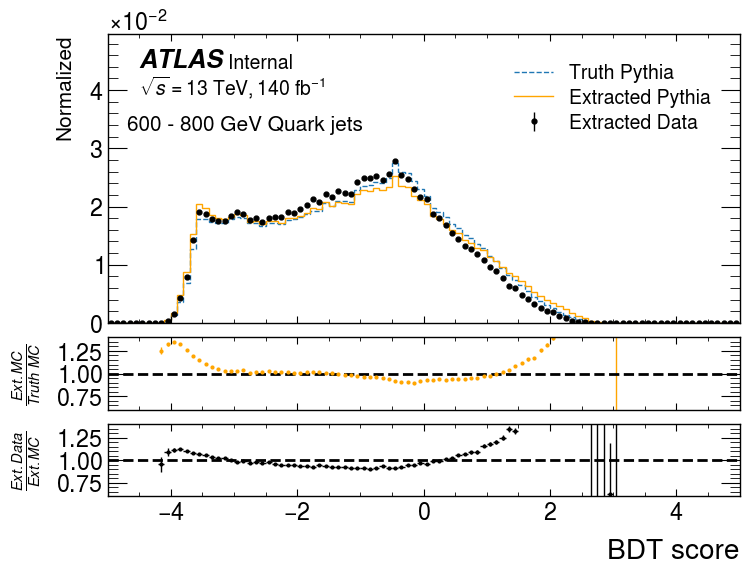

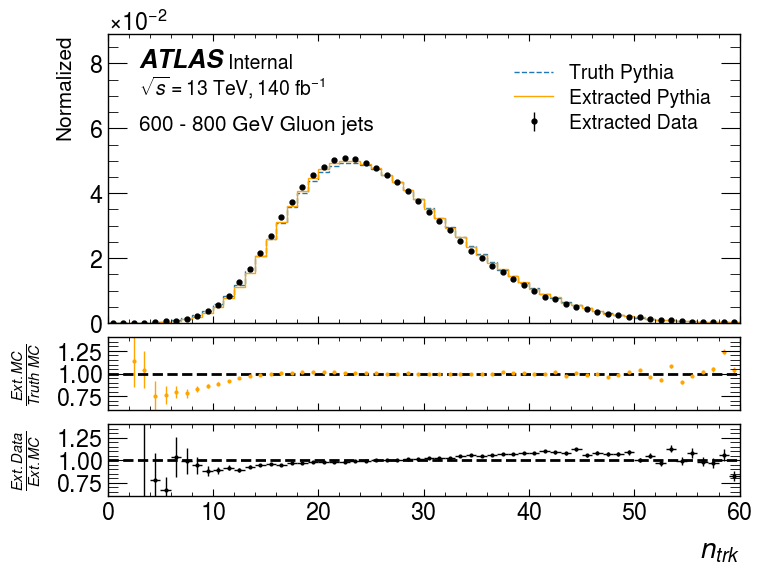

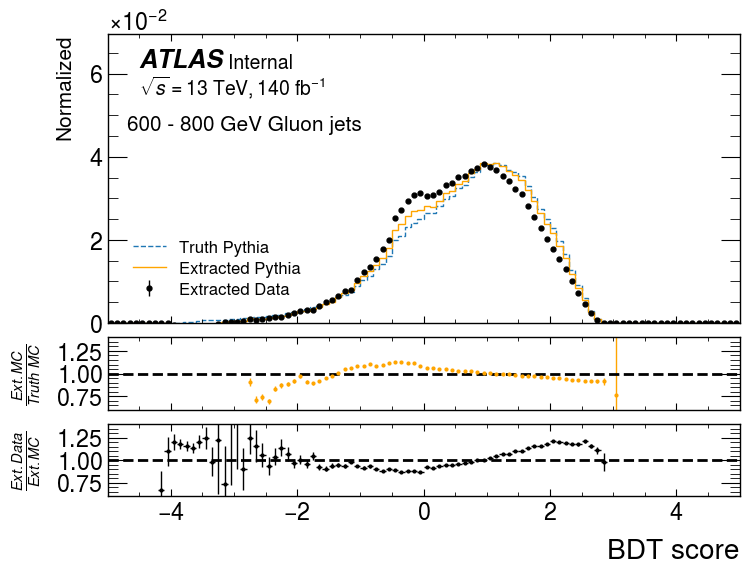

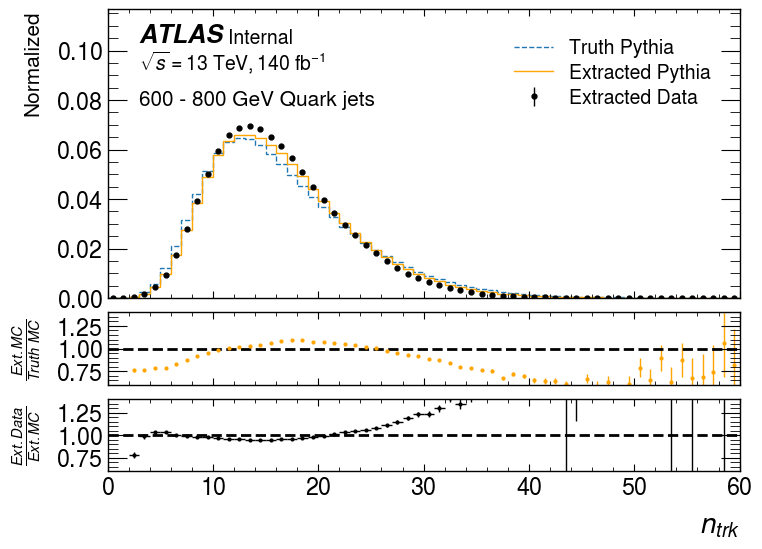

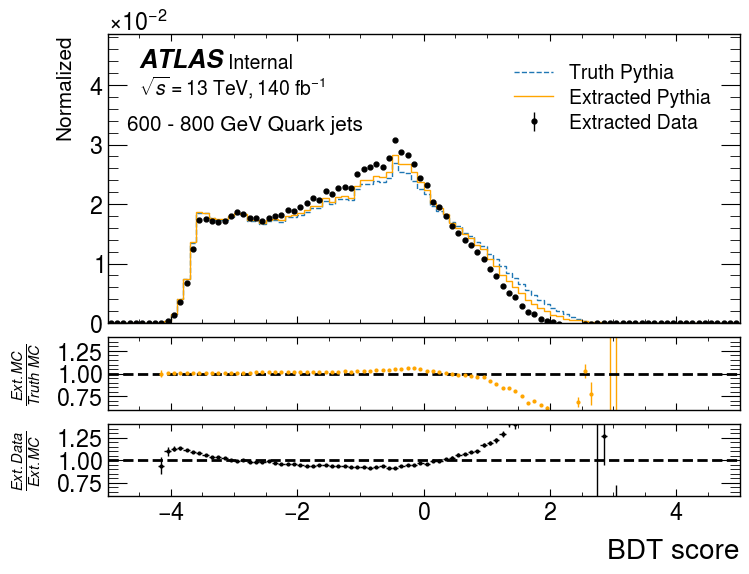

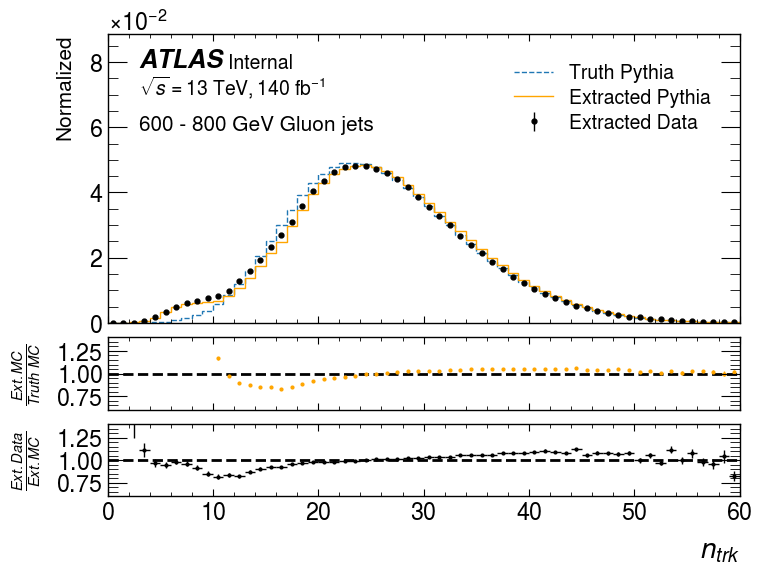

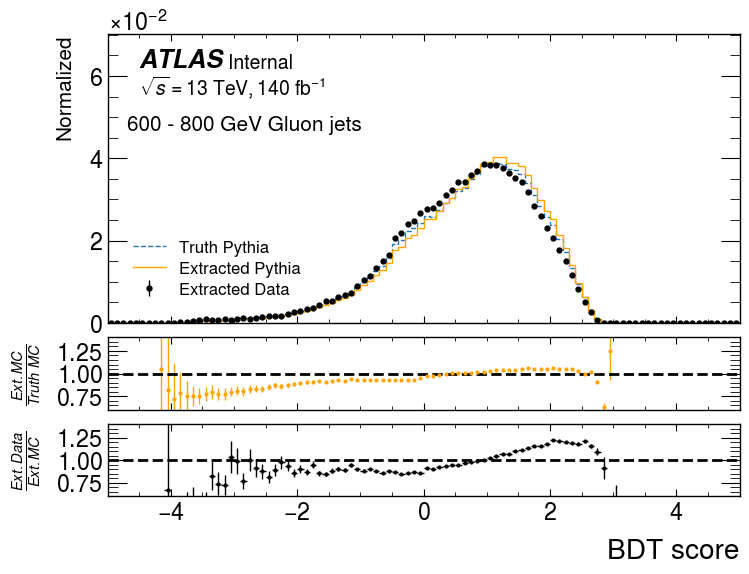

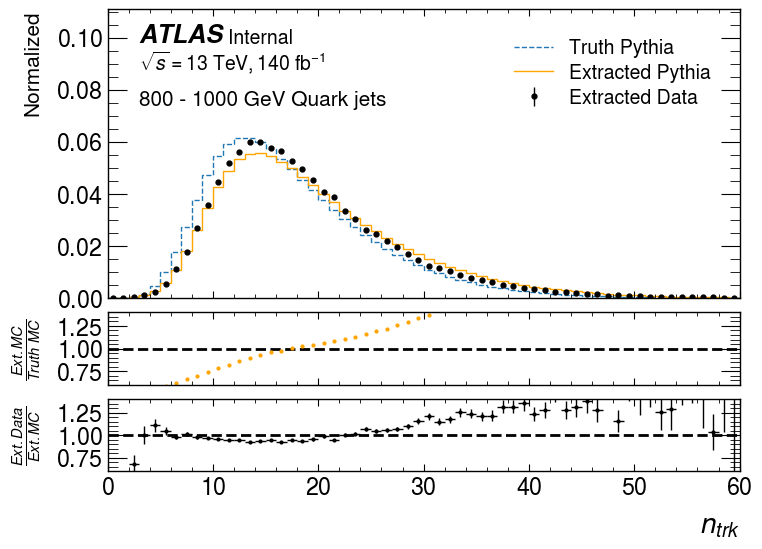

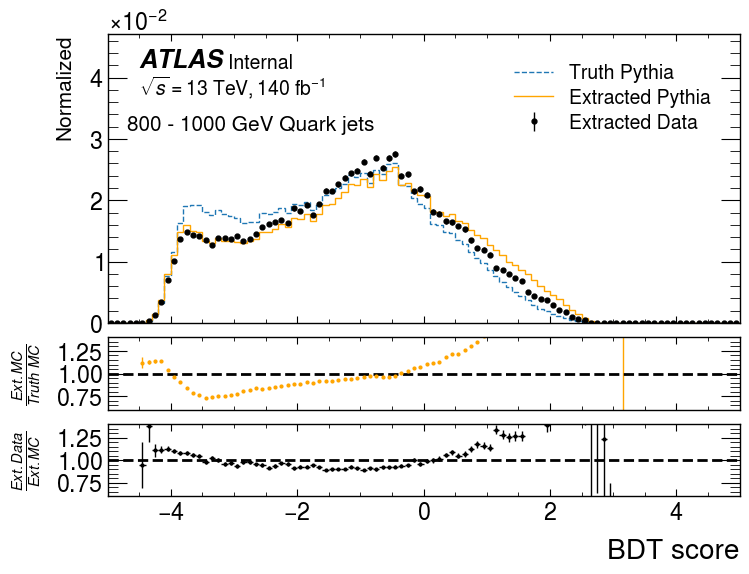

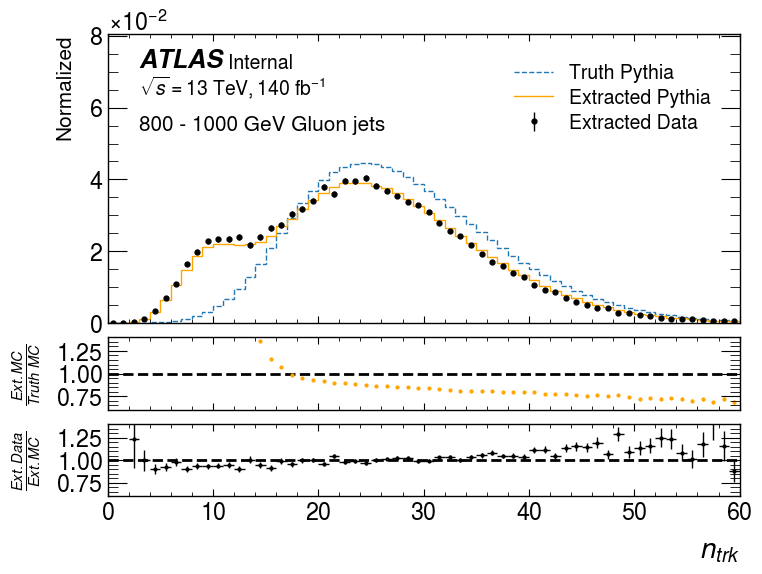

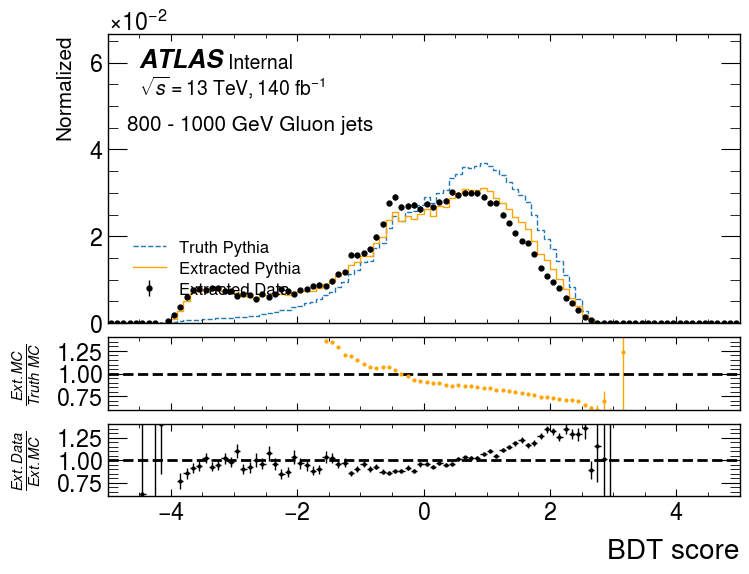

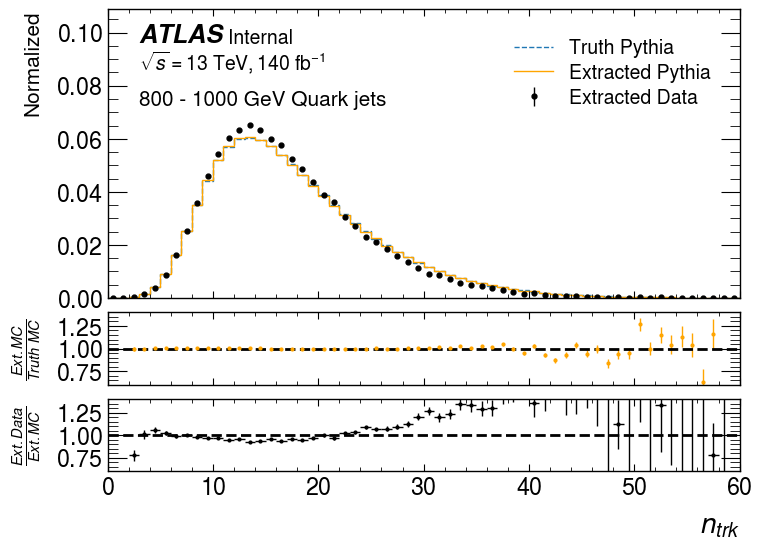

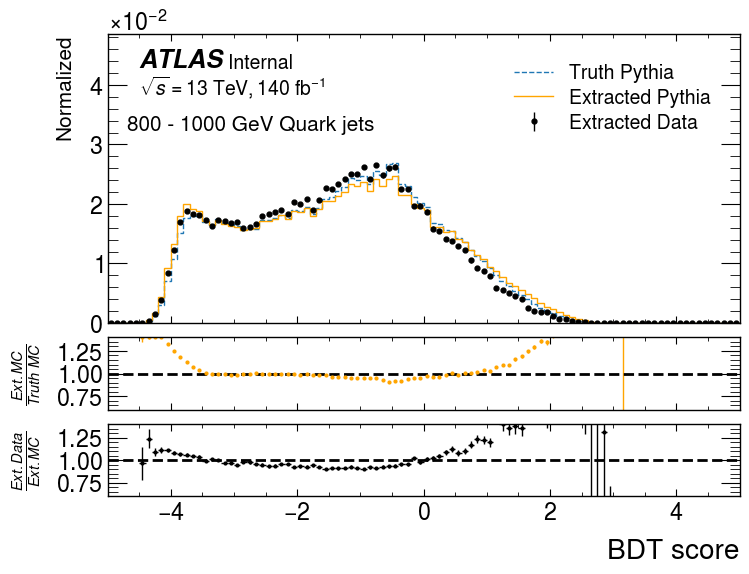

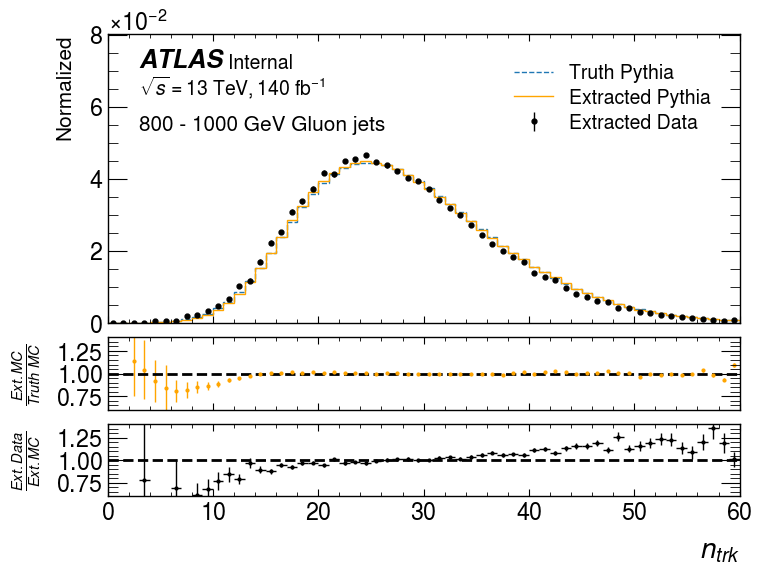

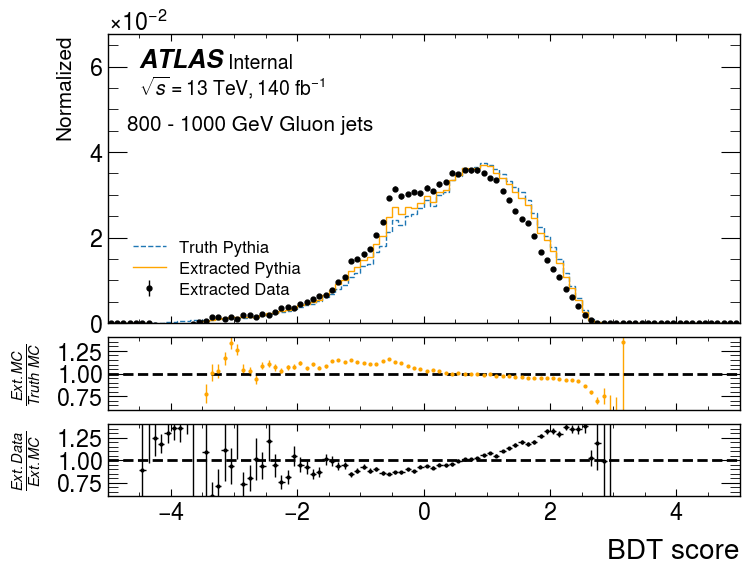

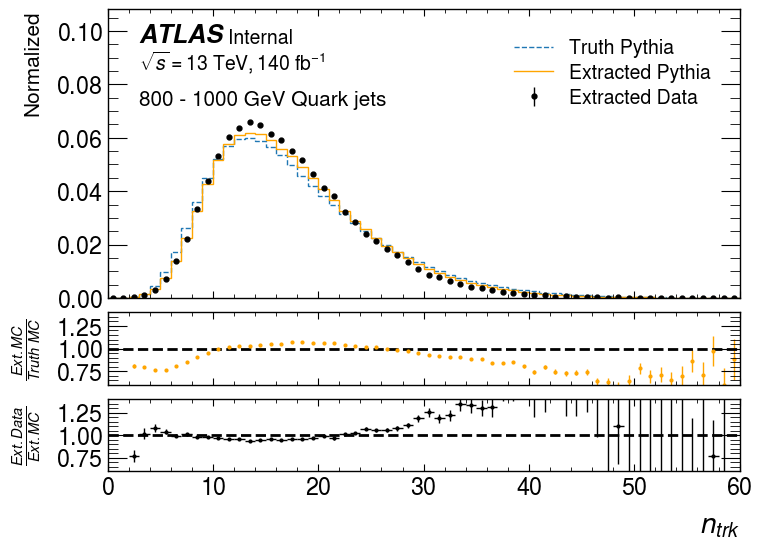

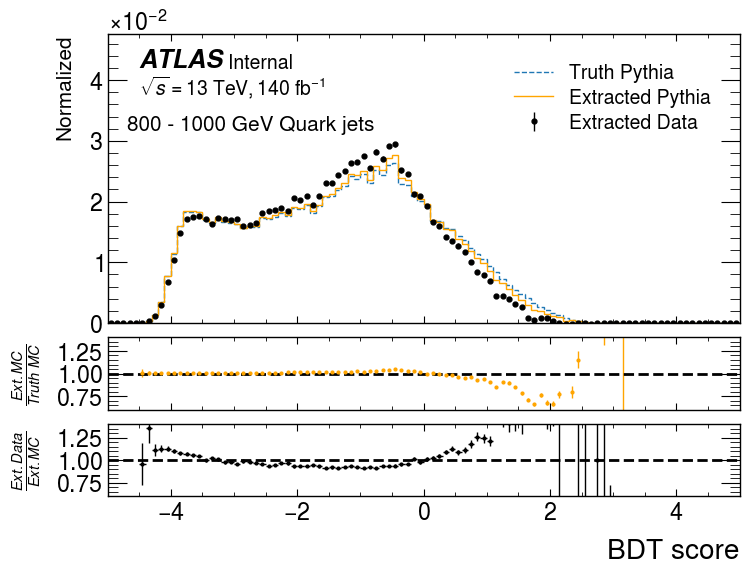

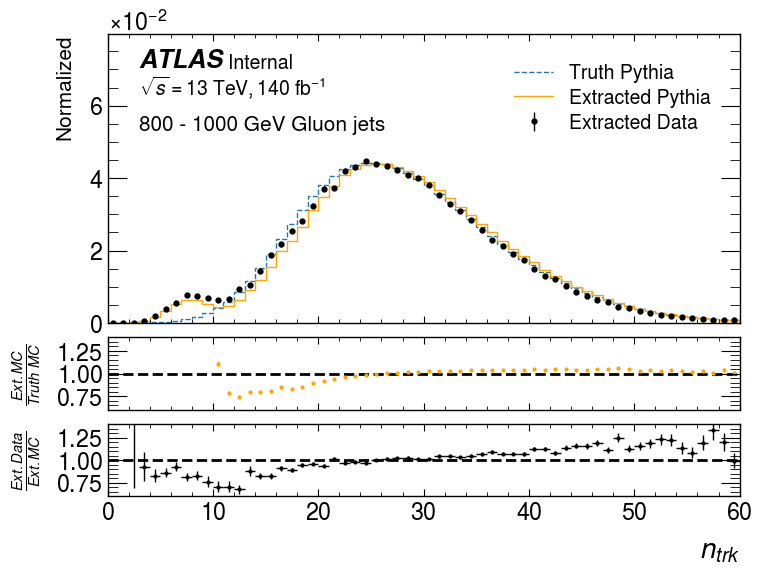

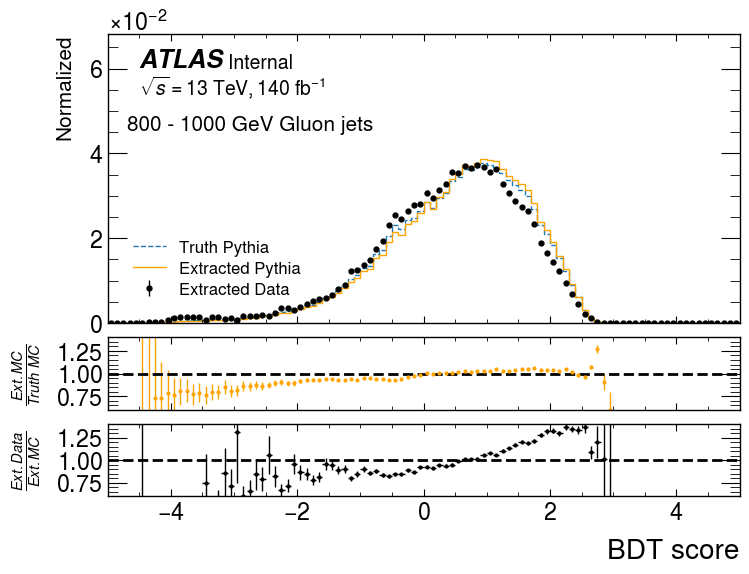

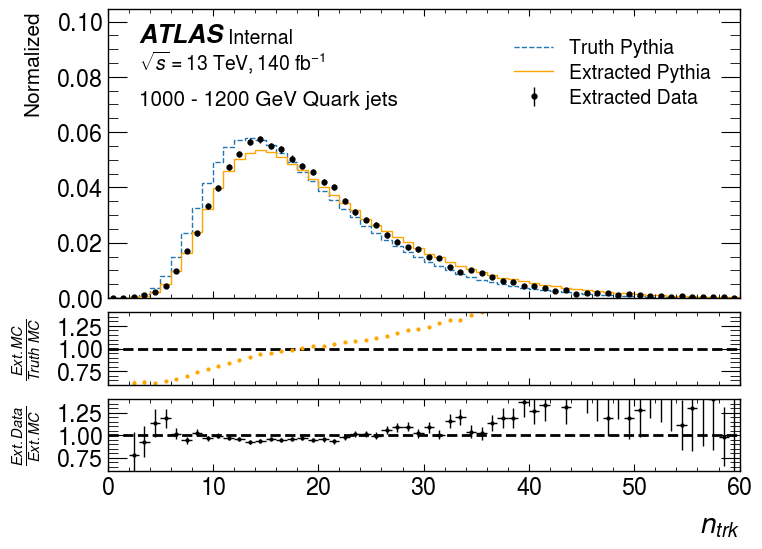

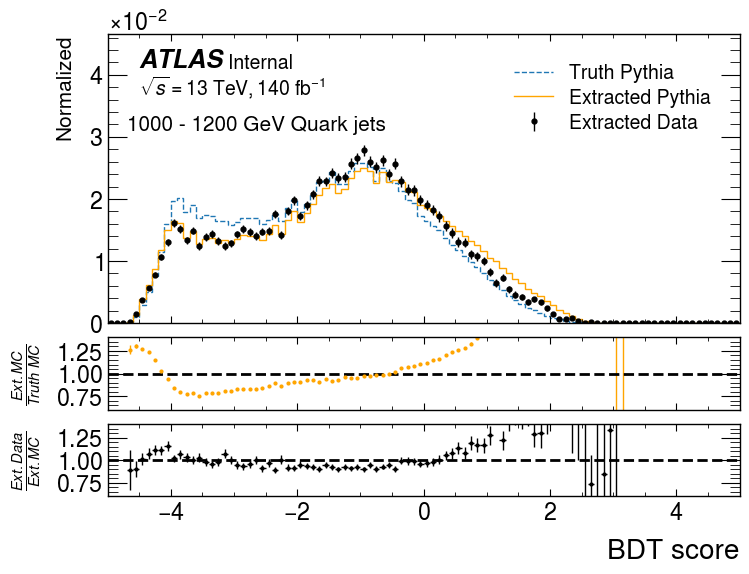

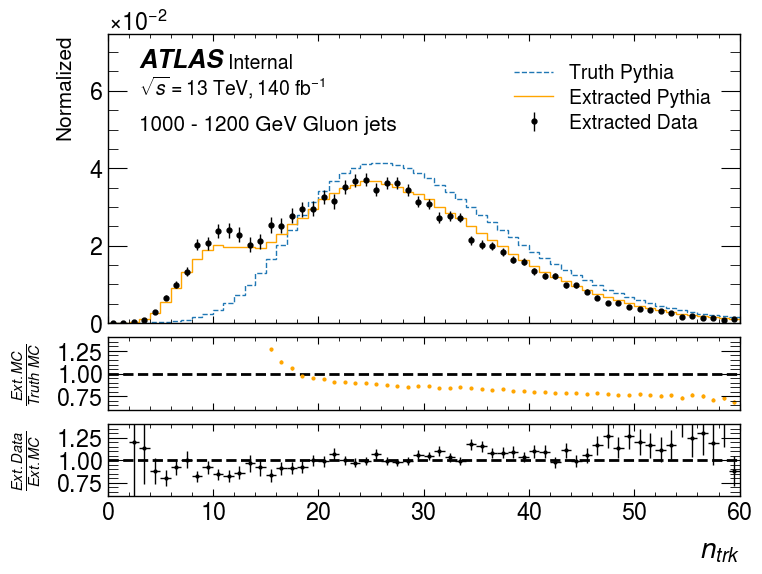

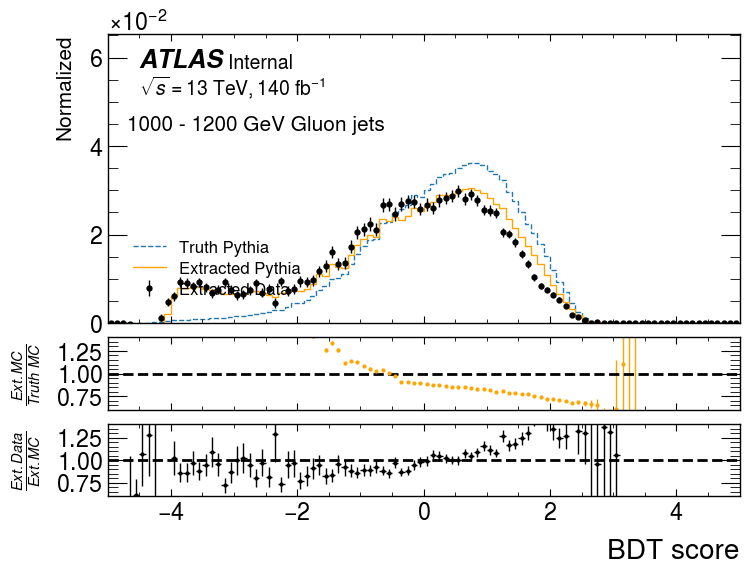

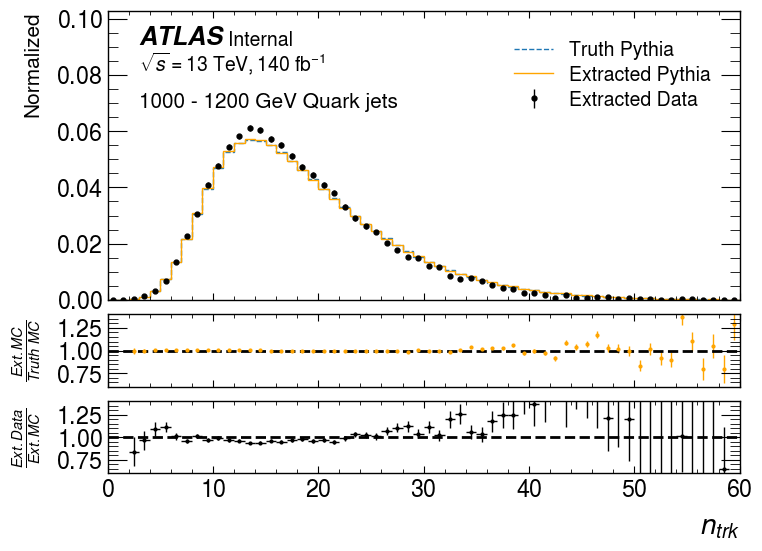

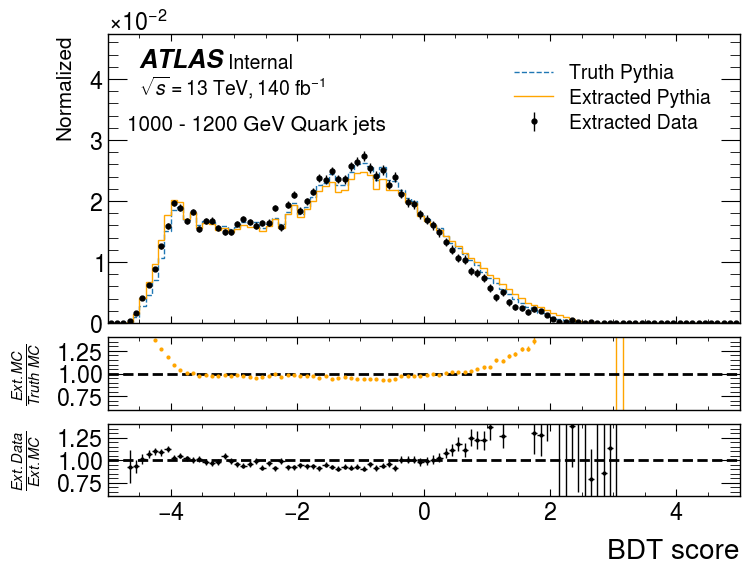

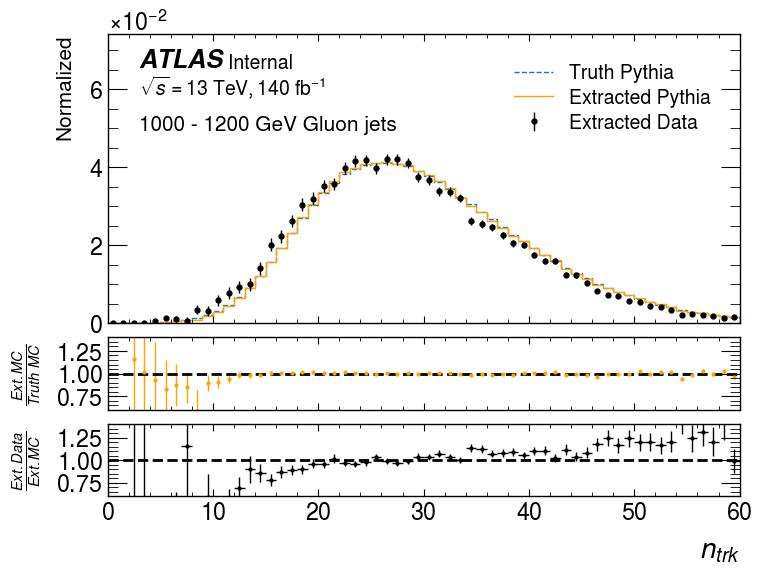

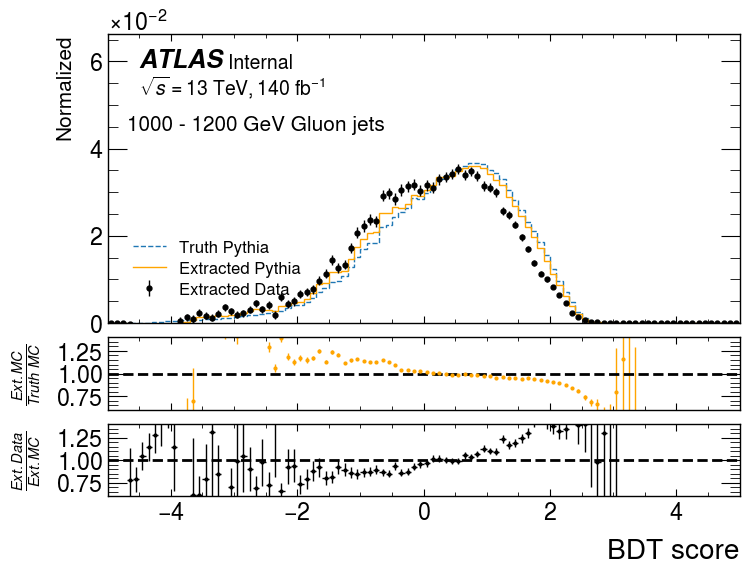

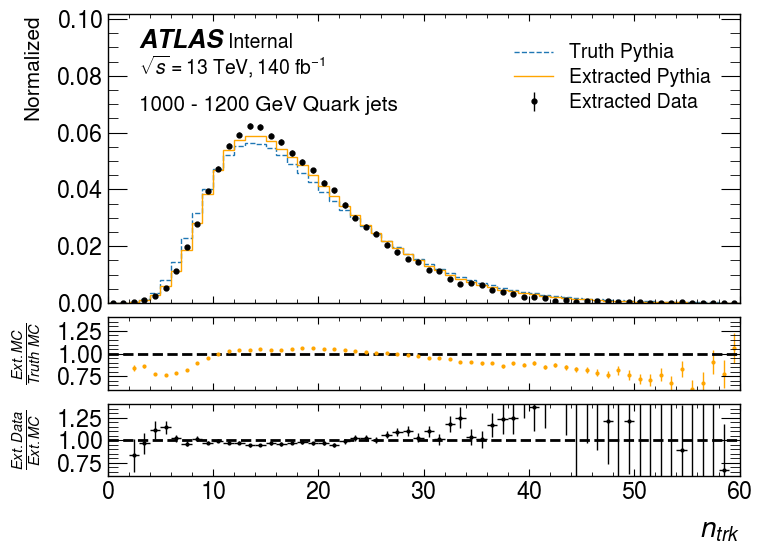

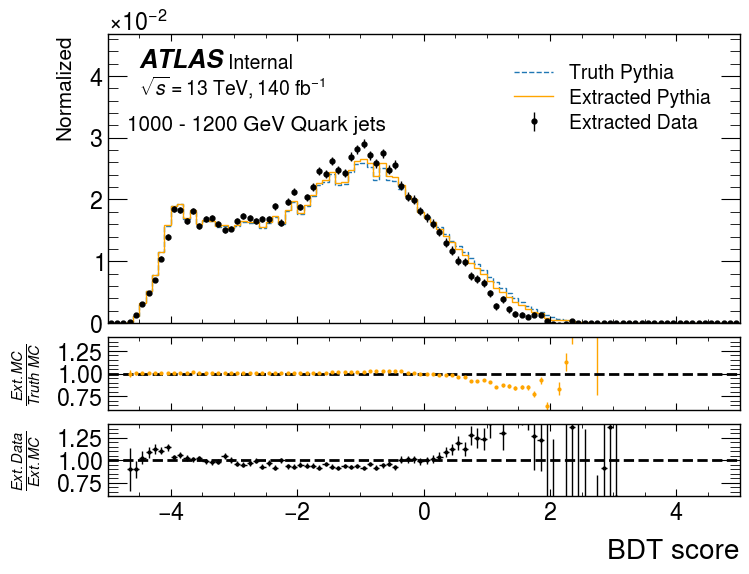

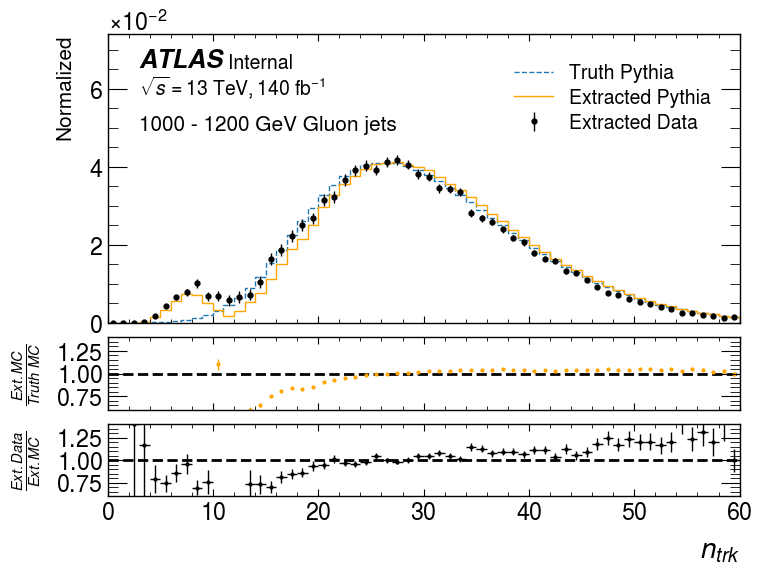

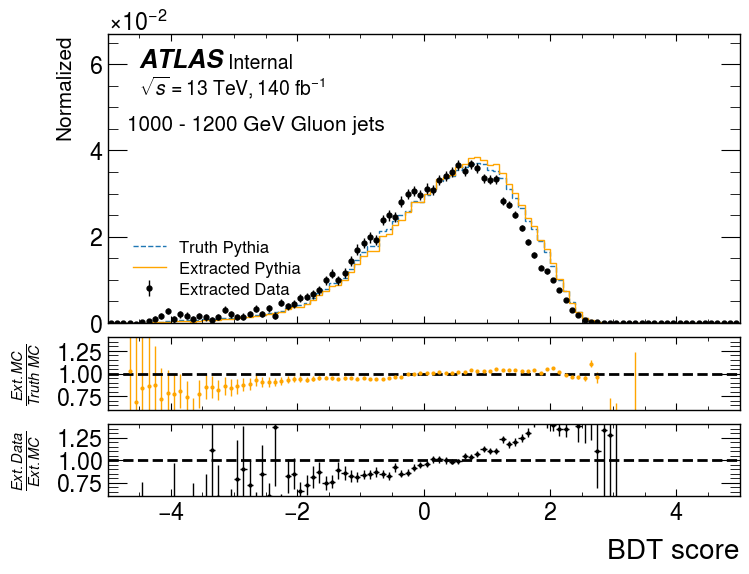

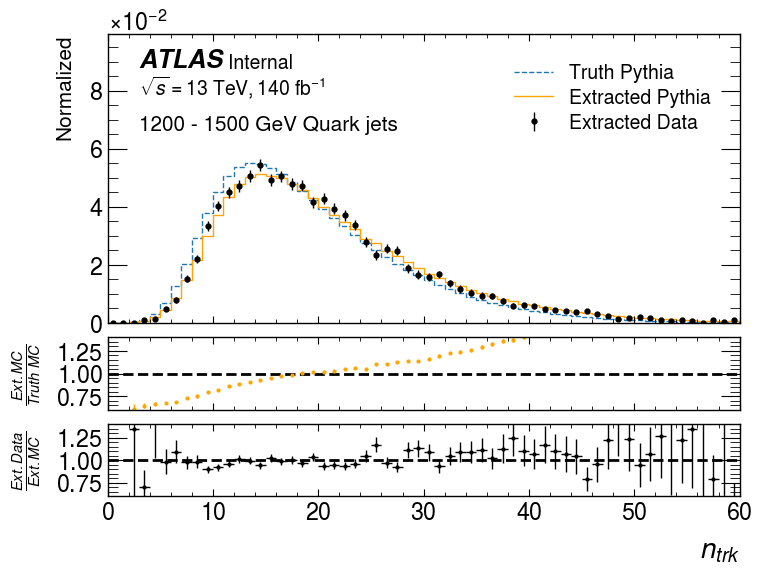

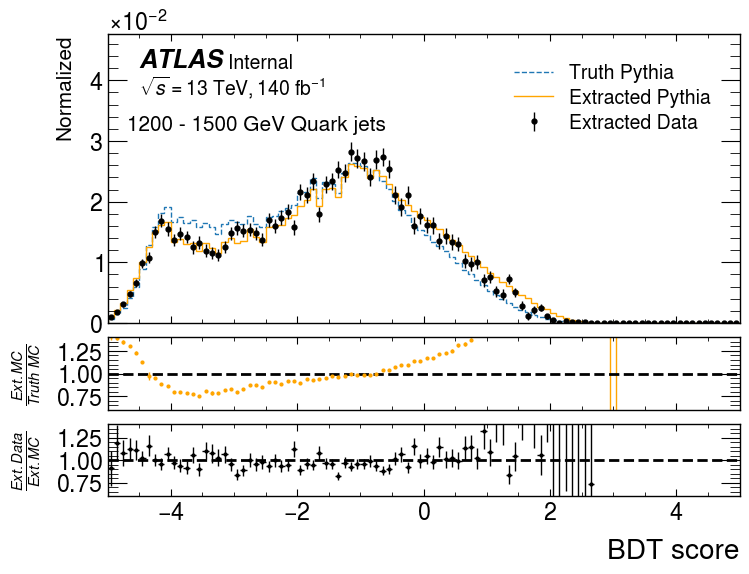

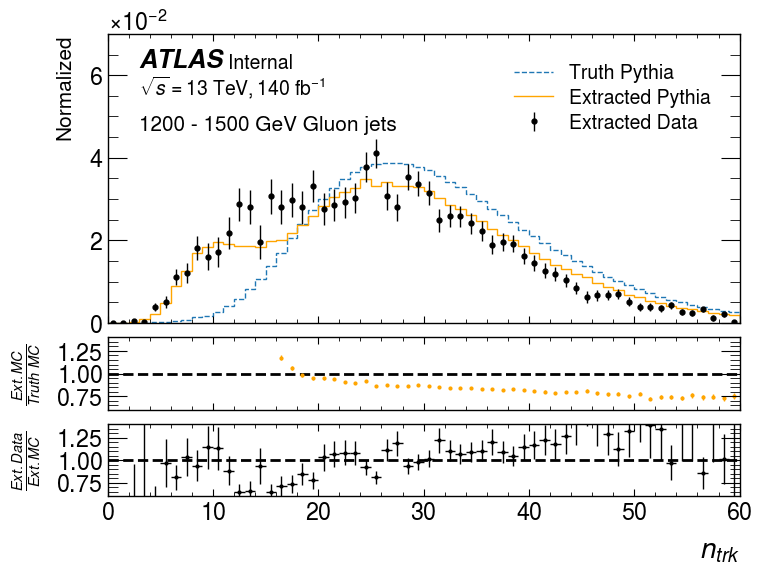

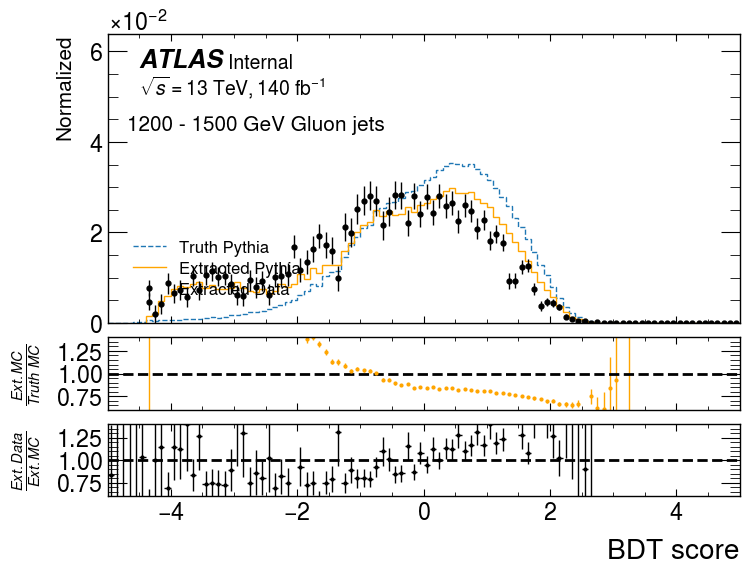

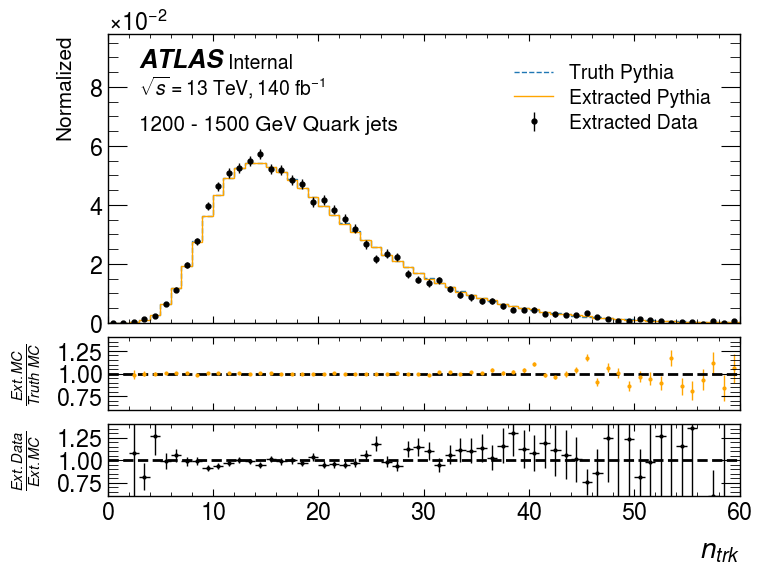

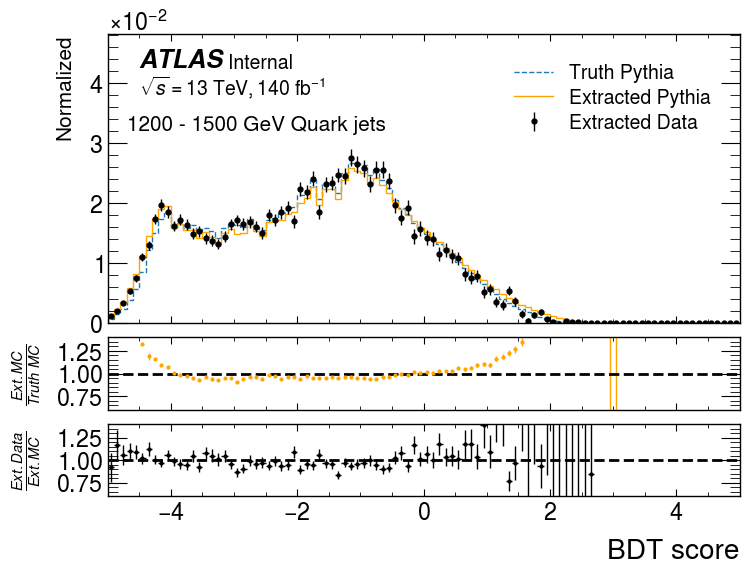

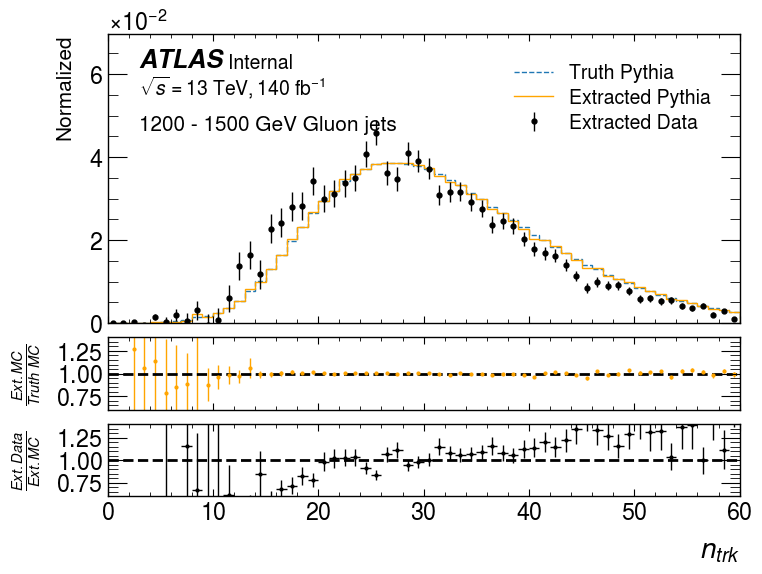

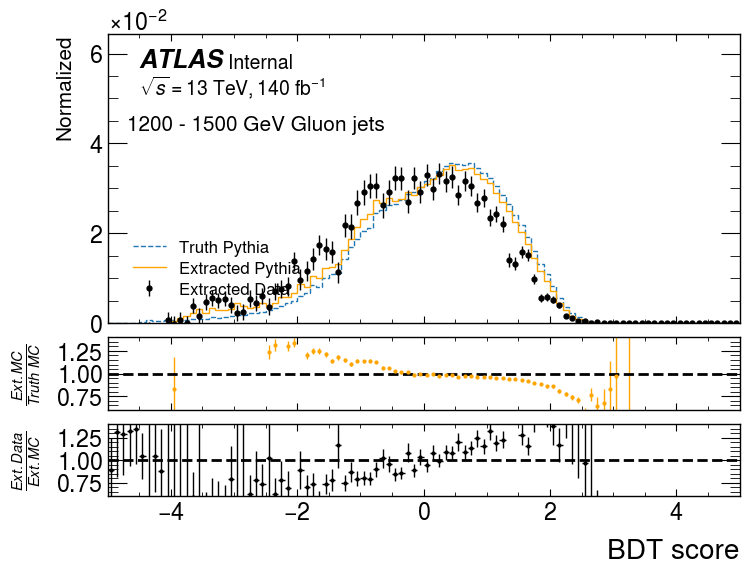

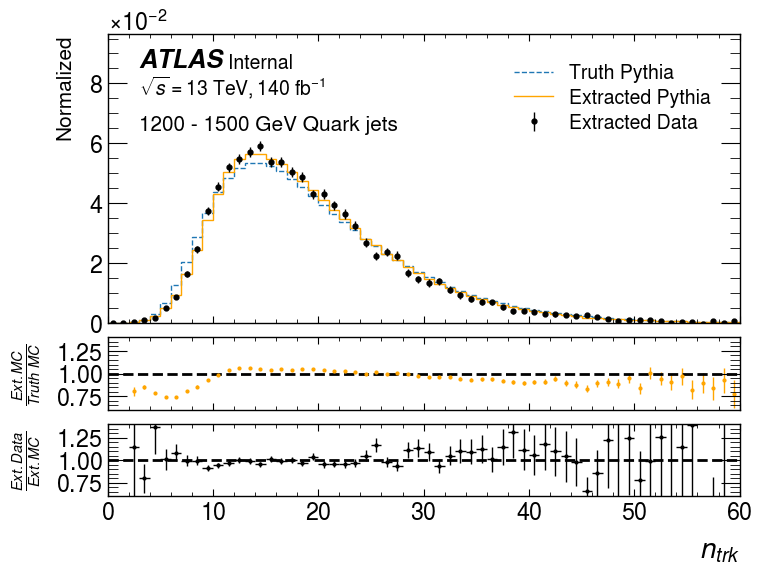

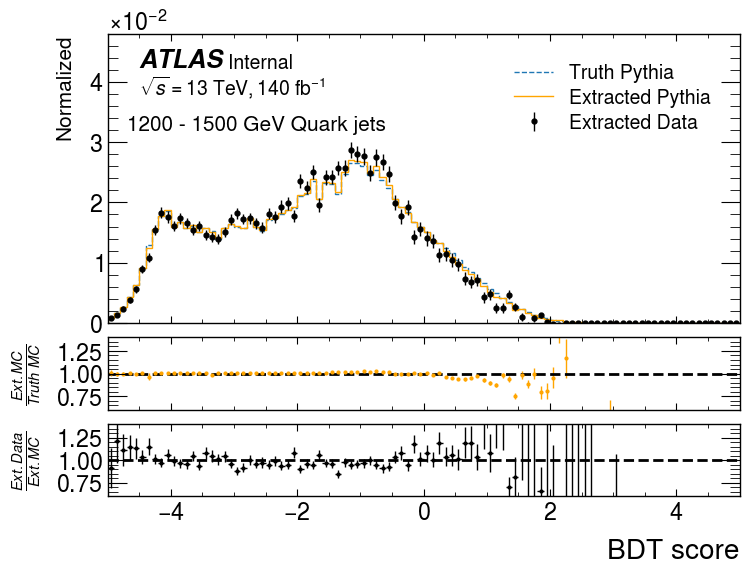

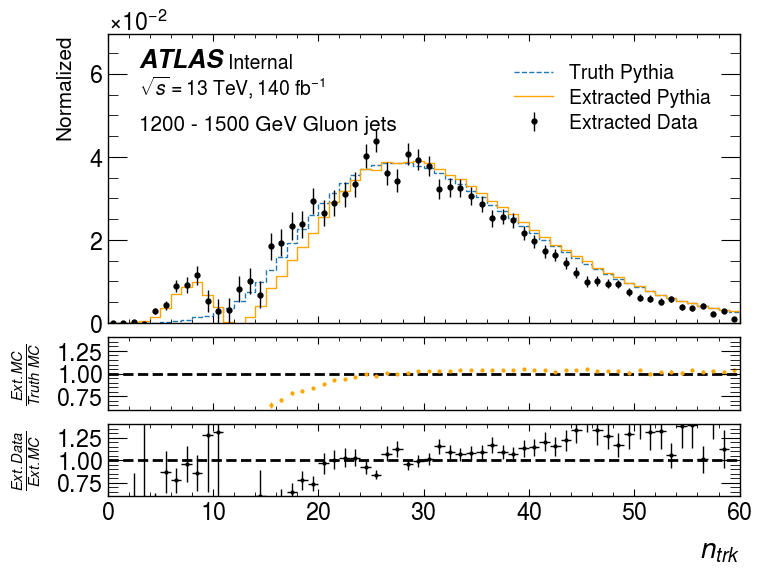

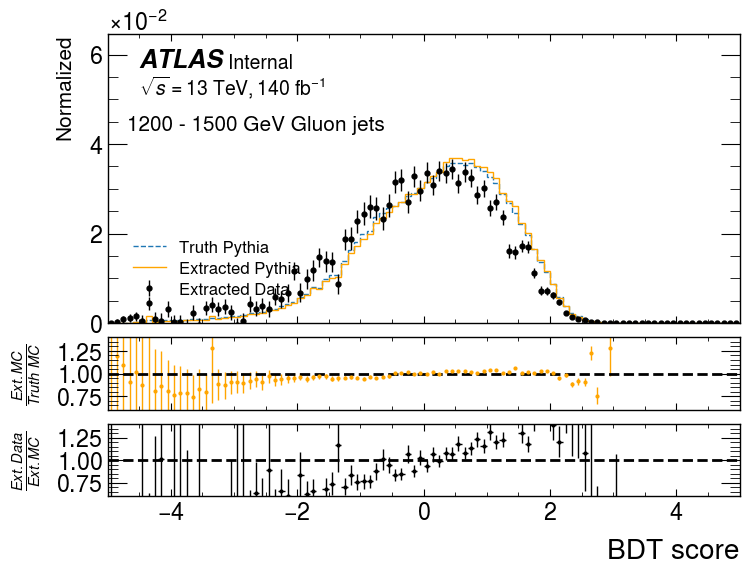

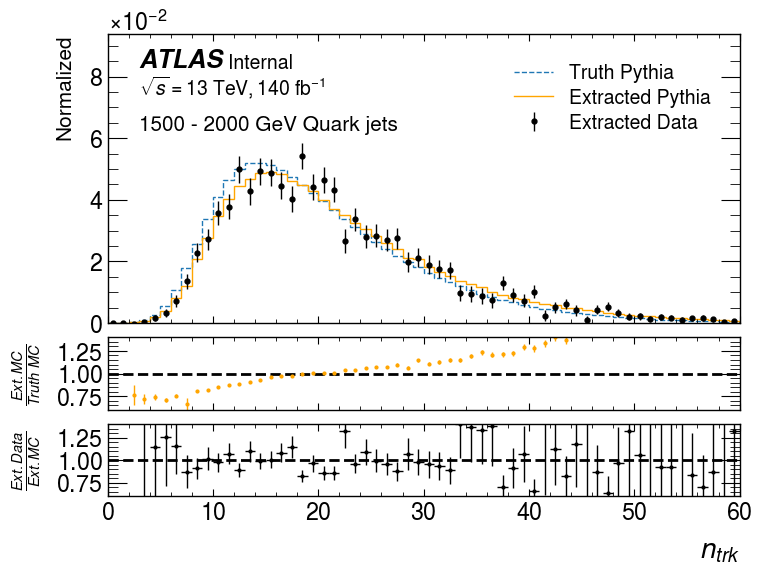

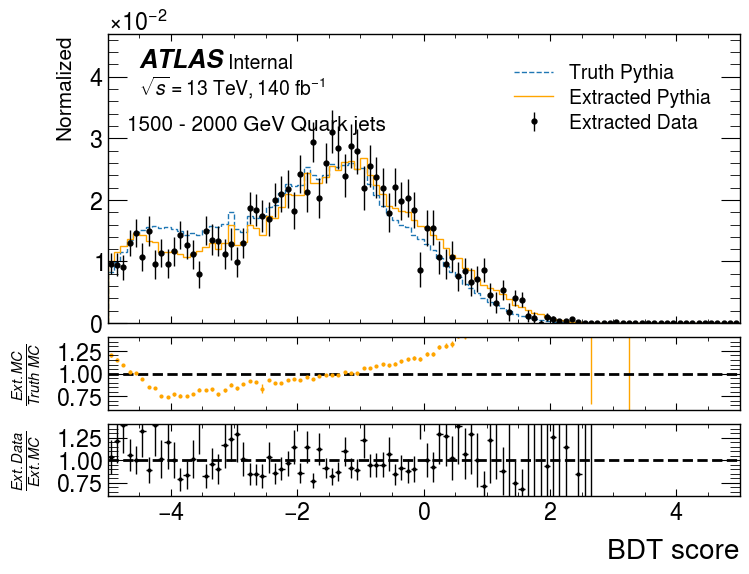

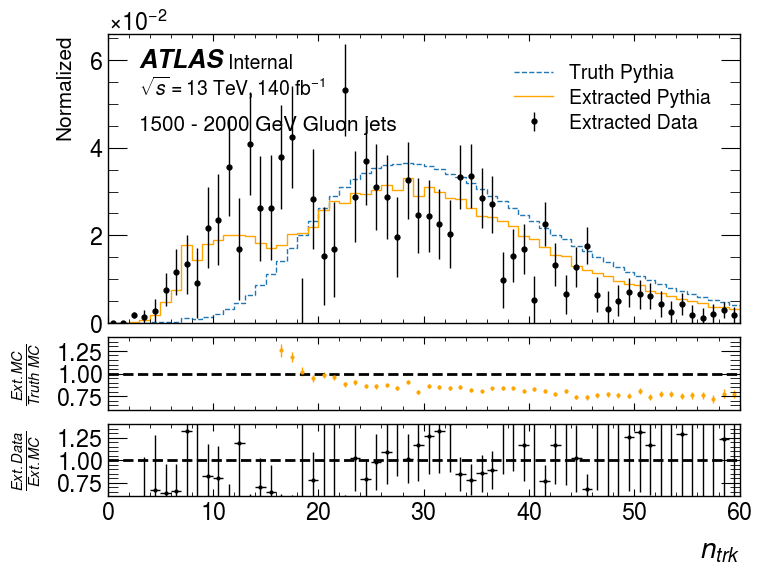

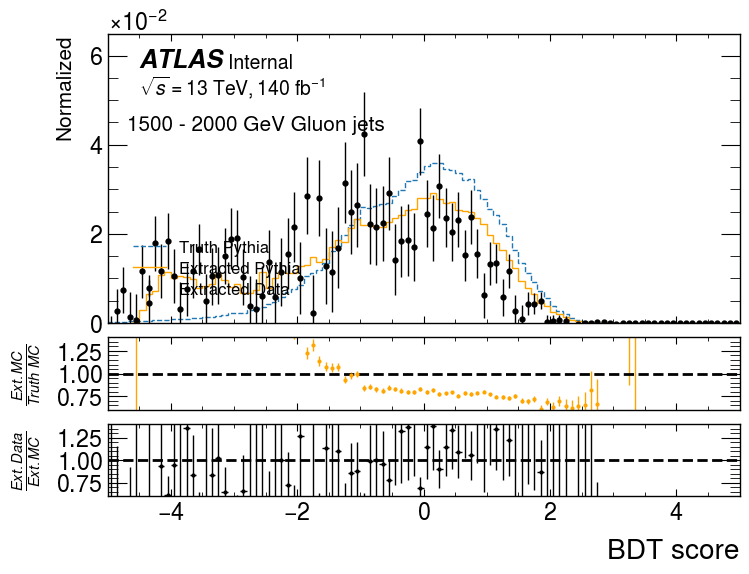

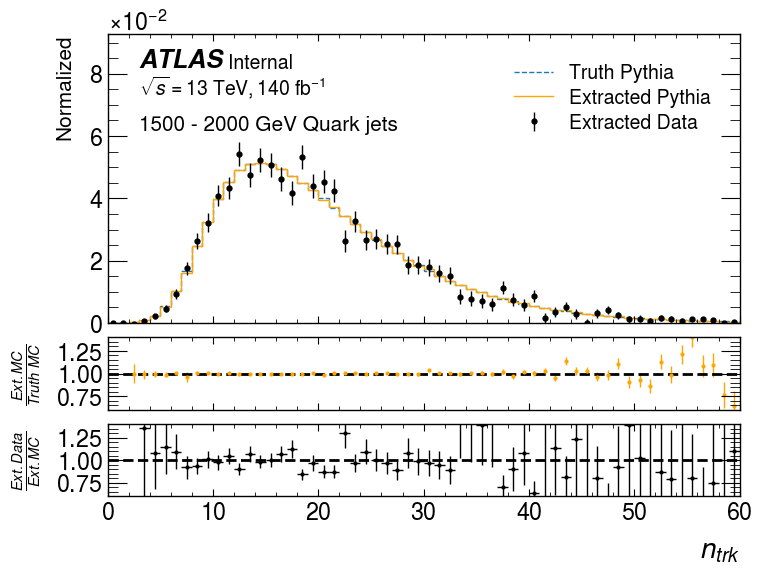

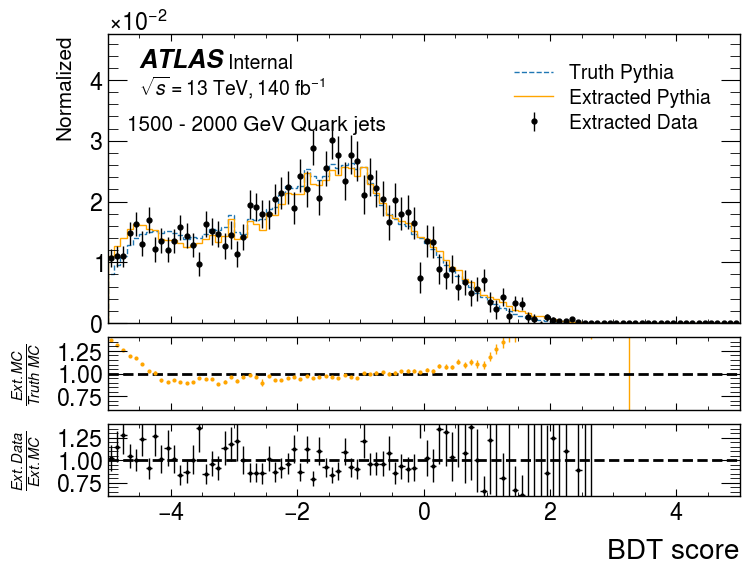

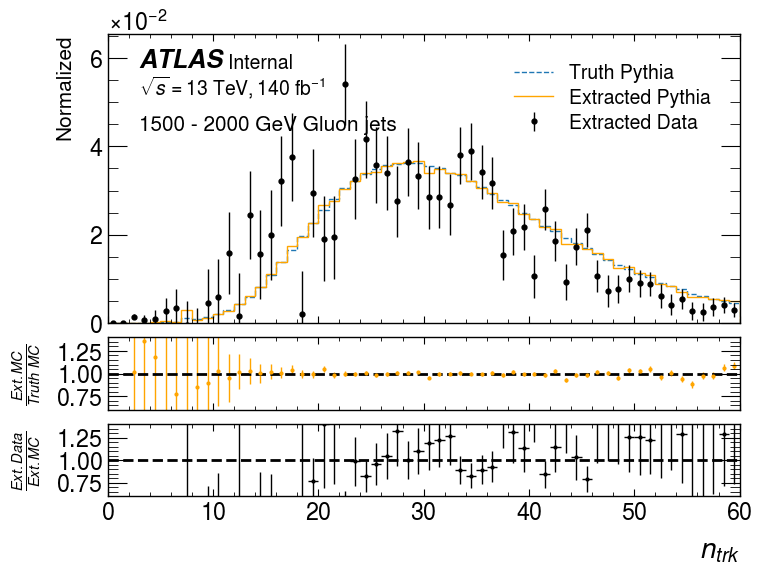

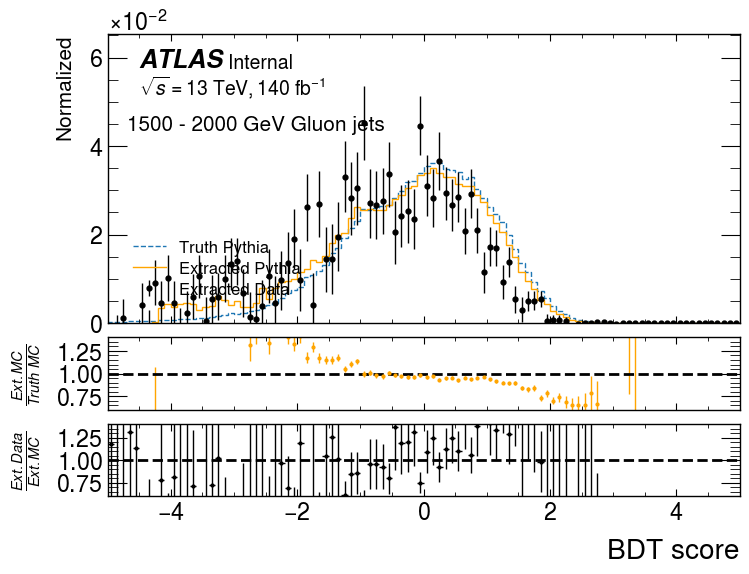

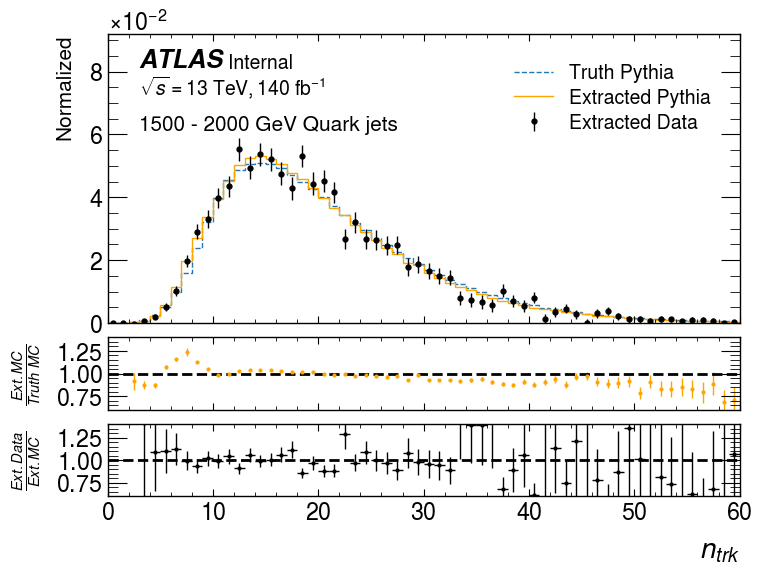

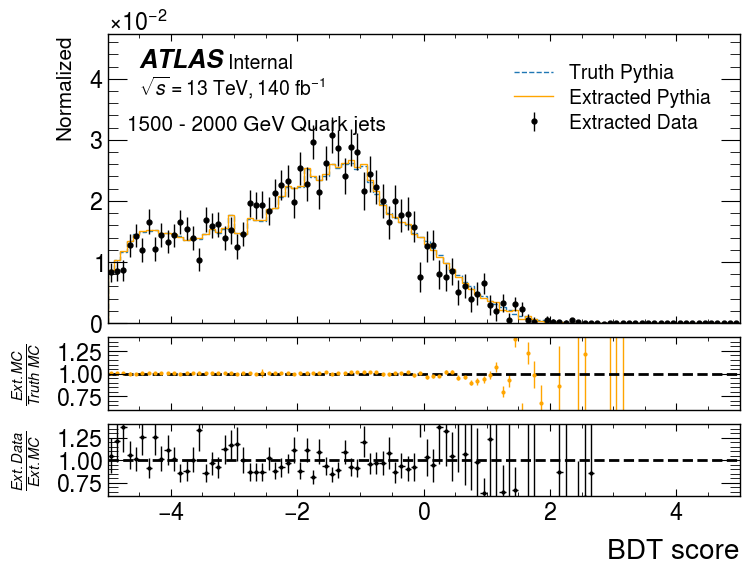

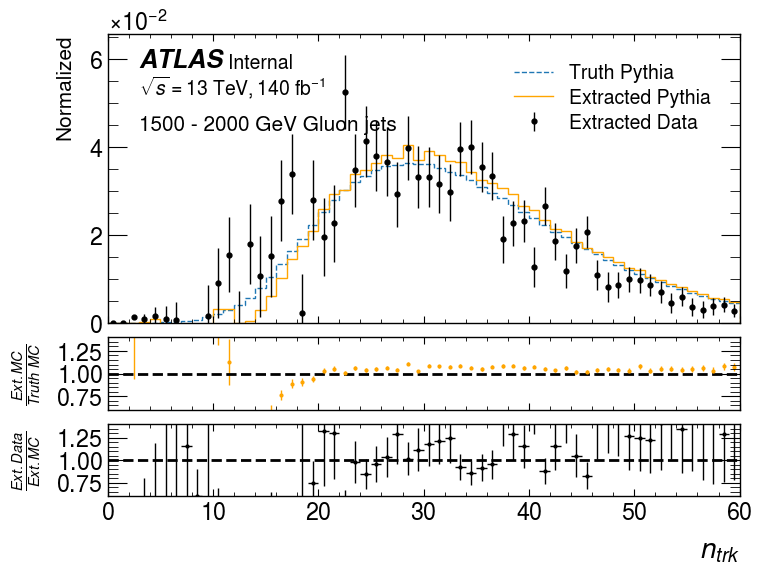

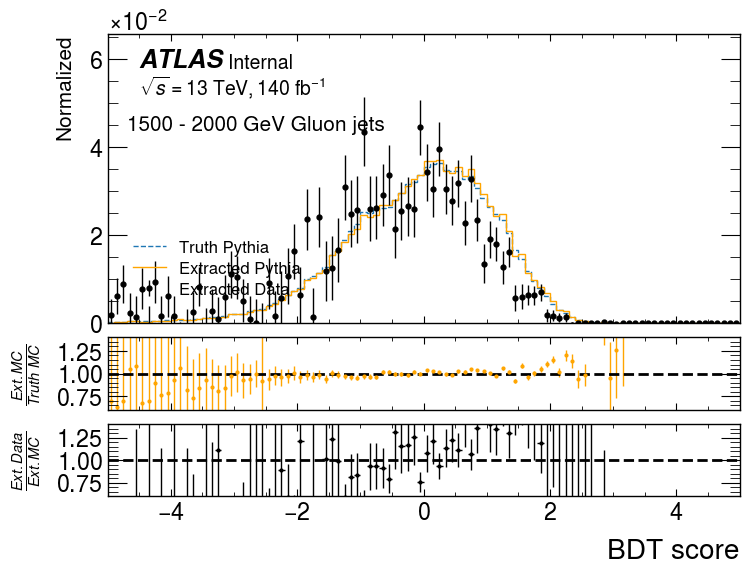

In [10]:
SFs = {}
Extraction_Results={}
syst_list=['nominal']#,'hadronization/sherpa','hadronization/sherpalund','matrix_element/powhegpythia','parton_shower/herwigangle','parton_shower/herwigdipole']

for i_pt, pt in enumerate(label_ptrange[:-1]):
    for rvar in reweighting_vars:
        #bin_centers1 = 1/2 * (bin_edges[:-1] + bin_edges[1:])
        for parton in partons:
            #fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})

            for i, syst in enumerate(syst_list):
                syst_path= pkl_path / syst / 'plots' / 'ADE' / 'Extraction_Results'
                Extraction_Results[syst]= joblib.load(syst_path / f'{rvar}_Extraction_Results.pkl' )

                for var in label_var: 
                    bin_edges = HistBins[var]
                    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, gridspec_kw={'height_ratios': [4, 1, 1], 'hspace': 0.1})


                    Extraction_var_pt =  Extraction_Results[syst][var][pt]
        
                    syst_truth = Extraction_Results[syst][var][pt][f'p_{parton}']        
                    syst_Q = Extraction_Results[syst][var][pt][f'extract_p_{parton}_MC']
                    #syst_data=Extraction_Results[syst][var][pt][f'extract_p_{parton}_Data']
                    nom_data=Extraction_Results['nominal'][var][pt][f'extract_p_{parton}_Data']

                    y_max = np.max(unumpy.nominal_values(syst_truth))


                    hep.histplot(unumpy.nominal_values(syst_truth),bins=bin_edges,label=f'Truth Pythia',ax=ax0,histtype='step',linestyle='--')
                    hep.histplot(unumpy.nominal_values(syst_Q),bins=bin_edges,label=f'Extracted Pythia',ax=ax0,histtype='step',linestyle='-',color='orange')
                    #hep.histplot(unumpy.nominal_values(syst_Q),bins=bin_edges,label=Map_gen[syst],ax=ax0,histtype='errorbar',marker=markers[i],yerr=unumpy.std_devs(syst_Q),markersize=5)#,color=ind_all[i])
                    hep.histplot(unumpy.nominal_values(nom_data),bins=bin_edges,label='Extracted Data',ax=ax0,histtype='errorbar',marker=".",color='black',yerr=unumpy.std_devs(nom_data),markersize=7)

                
                    ax0.set_ylim(0, y_max * 1.8)
                    ytext=y_max * 1.2
                    ax0.set_ylabel("Normalized",fontsize=15)
                    hep.atlas.label(label='Internal',ax=ax0,data=True,lumi=140)

                    ratio_truthMC_over_extractedMC2 = safe_array_divide_unumpy(syst_Q,nom_data)

                    ratio_truthMC_over_extractedMC = safe_array_divide_unumpy(syst_Q,syst_truth)
                    hep.histplot(unumpy.nominal_values(ratio_truthMC_over_extractedMC),bins=bin_edges,ax=ax1,histtype='errorbar',marker=".",yerr=unumpy.std_devs(ratio_truthMC_over_extractedMC),markersize=4,color='orange')
                    hep.histplot(unumpy.nominal_values(ratio_truthMC_over_extractedMC2),bins=bin_edges,ax=ax2,histtype='errorbar',marker=".",color='black',yerr=unumpy.std_devs(ratio_truthMC_over_extractedMC2),xerr=True,markersize=4)

                    ax1.set_ylim(0.6,1.4)
                    ax2.set_ylim(0.6,1.4)
                    #ax1.set_ylabel("MC closure",loc='center',fontsize=15)
                    #ax1.set_ylabel("Ratio to Data",loc='center',fontsize=15)
                    ax1.set_ylabel(r"$\frac{Ext.MC}{Truth~MC}$",loc='center',fontsize=15)
                    ax2.set_ylabel(r"$\frac{Ext.Data}{Ext.MC}$",loc='center',fontsize=15)
                    if var == 'GBDT_newScore' and parton == 'Gluon':
                        ax0.legend(loc='lower left',fontsize=12)
                    else:
                        ax0.legend(loc='upper right')

                    ax0.text(bin_edges[3],ytext,f'{pt} - {label_ptrange[i_pt+1]} GeV {parton} jets',fontsize=15)
                    ax1.set_xlim(bin_edges[0], bin_edges[-1])
                    ax2.set_xlim(bin_edges[0], bin_edges[-1])
                    ax2.set_xlabel(f"{Map_var_title[var]}")
                    ax1.hlines(y = 1, xmin = bin_edges[0], xmax = bin_edges[-1], color = 'black', linestyle = '--')
                    ax2.hlines(y = 1, xmin = bin_edges[0], xmax = bin_edges[-1], color = 'black', linestyle = '--')

                    fig.savefig(f'../mcclosure_sf_tight/mcclosure_{rvar}_{parton}_{pt}_{var}_SF.pdf')
         

FileNotFoundError: [Errno 2] No such file or directory: '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots_new/hadronization/sherpa/plots/ADE/Extraction_Results/jet_nTracks_Extraction_Results.pkl'

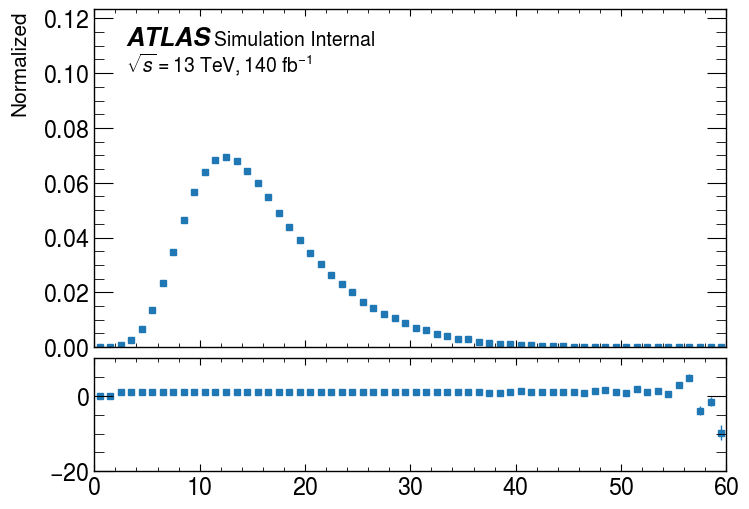

In [7]:
SFs = {}
Extraction_Results={}
syst_list=['nominal','hadronization/sherpa','hadronization/sherpalund','matrix_element/powhegpythia','parton_shower/herwigangle','parton_shower/herwigdipole']



for i_pt, pt in enumerate(label_ptrange[:-1]):
    for var in reweighting_vars:
        bin_edges = HistBins[var]
        #bin_centers1 = 1/2 * (bin_edges[:-1] + bin_edges[1:])
        for parton in partons:
            #fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1], 'hspace': 0.1})
            fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})

            for i, syst in enumerate(syst_list):
                syst_path= pkl_path / syst / 'plots' / 'ADE' / 'Extraction_Results'
                Extraction_Results[syst]= joblib.load(syst_path / f'{var}_Extraction_Results.pkl' )
            
                Extraction_var_pt =  Extraction_Results[syst][var][pt]
      
                syst_truth = Extraction_Results[syst][var][pt][f'p_{parton}']        
                syst_Q = Extraction_Results[syst][var][pt][f'extract_p_{parton}_MC']
                syst_data=Extraction_Results[syst][var][pt][f'extract_p_{parton}_Data']
                nom_data=Extraction_Results['nominal'][var][pt][f'extract_p_{parton}_Data']

                y_max = np.max(unumpy.nominal_values(syst_truth))


                #hep.histplot(unumpy.nominal_values(syst_truth),bins=bin_edges,label=f'Truth {syst}',ax=ax0,histtype='step',linestyle='--')
                #hep.histplot(unumpy.nominal_values(syst_Q),bins=bin_edges,label=f'Extracted {syst}',ax=ax0,histtype='step',linestyle='-')
                hep.histplot(unumpy.nominal_values(syst_Q),bins=bin_edges,label=Map_gen[syst],ax=ax0,histtype='errorbar',marker=markers[i],yerr=unumpy.std_devs(syst_Q),markersize=5)#,color=ind_all[i])

            
                ax0.set_ylim(0, y_max * 1.8)
                ytext=y_max * 1.2
                ax0.set_ylabel("Normalized",fontsize=15)
                hep.atlas.label(label='Internal',ax=ax0,lumi=140)

                #ratio_truthMC_over_extractedMC = safe_array_divide_unumpy(syst_Q,nom_data)

                ratio_truthMC_over_extractedMC = safe_array_divide_unumpy(syst_Q,syst_truth)
                hep.histplot(unumpy.nominal_values(ratio_truthMC_over_extractedMC),bins=bin_edges,ax=ax1,histtype='errorbar',marker=markers[i],yerr=unumpy.std_devs(ratio_truthMC_over_extractedMC),markersize=4)
                #hep.histplot(unumpy.nominal_values(ratio_truthMC_over_extractedMC),bins=bin_edges,ax=ax1,histtype='errorbar',marker=".",color='black',yerr=unumpy.std_devs(ratio_truthMC_over_extractedMC),xerr=True,markersize=4)
            #hep.histplot(unumpy.nominal_values(nom_data),bins=bin_edges,label='Data',ax=ax0,histtype='errorbar',marker=".",color='black',yerr=unumpy.std_devs(nom_data),markersize=7)

            ax1.set_ylim(0.6,1.4)
                #ax2.set_ylim(0.6,1.4)
            ax1.set_ylabel("MC closure",loc='center',fontsize=15)
            #ax1.set_ylabel("Ratio to Data",loc='center',fontsize=15)
                #ax1.set_ylabel(r"$\frac{Extracted~MC}{Truth~MC}$",loc='center')
                #ax2.set_ylabel(r"$\frac{Data}{MC}$",loc='center')
            if var == 'GBDT_newScore' and parton == 'Gluon':
                ax0.legend(loc='lower left',fontsize=12)
            else:
                ax0.legend(loc='upper right')

            ax0.text(bin_edges[3],ytext,f'{pt} - {label_ptrange[i_pt+1]} GeV {parton} jets',fontsize=15)
            ax1.set_xlim(bin_edges[0], bin_edges[-1])
            ax1.set_xlabel(f"{Map_var_title[var]}")
            ax1.hlines(y = 1, xmin = bin_edges[0], xmax = bin_edges[-1], color = 'black', linestyle = '--')
            #ax2.hlines(y = 1, xmin = bin_edges[0], xmax = bin_edges[-1], color = 'black', linestyle = '--')

            fig.savefig(f'../mcclosure_gen/mcclosure_{var}_{parton}_{pt}_mc.pdf')
                #fig.savefig(f'./mcclosure_sf/mcclosure_{var}_{parton}_{pt}_SF.pdf')

